# Introduction

This data set are example TPC FEE input charge simulated with following setup: 

* Core software update: https://github.com/blackcathj/coresoftware/pull/new/tpc_charge
* Macro for single track: https://github.com/blackcathj/macros/pull/new/tpc_charge_single
* Macro for central AuAu + 200kHz pileup: https://github.com/blackcathj/macros/pull/new/tpc_charge_0-4fm_200kHz_AuAu

Three scenarios are simulated:
* `SingleTrack`: a single 20 GeV pi- track in near central psuedorapidity and max-drift
* `0-4fm_AuAu`: a single central Au+Au collision
* `0-4fm_100kHz_AuAu`: a single central Au+Au collision embedded into 100kHz MB AuAu collision pile ups. This is the typical high multiplicity environment sPHENIX TPC are expected to operate in. Please note the occupancy varys significantly from channel to channel. And the multiplcity would be enven higher in 200kHz Au+Au collsions. 

The result are in self-explaintory `JSON` files recording 1-drift window of charge data for each channels. Files are separated with TPC side/sector/layers. 

Here is an example inspection code as following:


In [1]:
%matplotlib inline  

Processing layer 7 from PadCharge_0-4fm_AuAu/PadCharge_side0_sector1_layer7.json
Processing layer 8 from PadCharge_0-4fm_AuAu/PadCharge_side0_sector1_layer8.json
Processing layer 9 from PadCharge_0-4fm_AuAu/PadCharge_side0_sector1_layer9.json
Processing layer 10 from PadCharge_0-4fm_AuAu/PadCharge_side0_sector1_layer10.json
Processing layer 11 from PadCharge_0-4fm_AuAu/PadCharge_side0_sector1_layer11.json
Processing layer 12 from PadCharge_0-4fm_AuAu/PadCharge_side0_sector1_layer12.json
Processing layer 13 from PadCharge_0-4fm_AuAu/PadCharge_side0_sector1_layer13.json
Processing layer 14 from PadCharge_0-4fm_AuAu/PadCharge_side0_sector1_layer14.json
Processing layer 15 from PadCharge_0-4fm_AuAu/PadCharge_side0_sector1_layer15.json
Processing layer 16 from PadCharge_0-4fm_AuAu/PadCharge_side0_sector1_layer16.json
Processing layer 17 from PadCharge_0-4fm_AuAu/PadCharge_side0_sector1_layer17.json
Processing layer 18 from PadCharge_0-4fm_AuAu/PadCharge_side0_sector1_layer18.json
Processing

/direct/u0b/software/jupyter/virtenvs/jhub_hostenv/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Processing layer 28 from PadCharge_0-4fm_AuAu/PadCharge_side0_sector1_layer28.json
Processing layer 29 from PadCharge_0-4fm_AuAu/PadCharge_side0_sector1_layer29.json
Processing layer 30 from PadCharge_0-4fm_AuAu/PadCharge_side0_sector1_layer30.json
Processing layer 31 from PadCharge_0-4fm_AuAu/PadCharge_side0_sector1_layer31.json
Processing layer 32 from PadCharge_0-4fm_AuAu/PadCharge_side0_sector1_layer32.json
Processing layer 33 from PadCharge_0-4fm_AuAu/PadCharge_side0_sector1_layer33.json
Processing layer 34 from PadCharge_0-4fm_AuAu/PadCharge_side0_sector1_layer34.json
Processing layer 35 from PadCharge_0-4fm_AuAu/PadCharge_side0_sector1_layer35.json
Processing layer 36 from PadCharge_0-4fm_AuAu/PadCharge_side0_sector1_layer36.json
Processing layer 37 from PadCharge_0-4fm_AuAu/PadCharge_side0_sector1_layer37.json
Processing layer 38 from PadCharge_0-4fm_AuAu/PadCharge_side0_sector1_layer38.json
Processing layer 39 from PadCharge_0-4fm_AuAu/PadCharge_side0_sector1_layer39.json
Proc

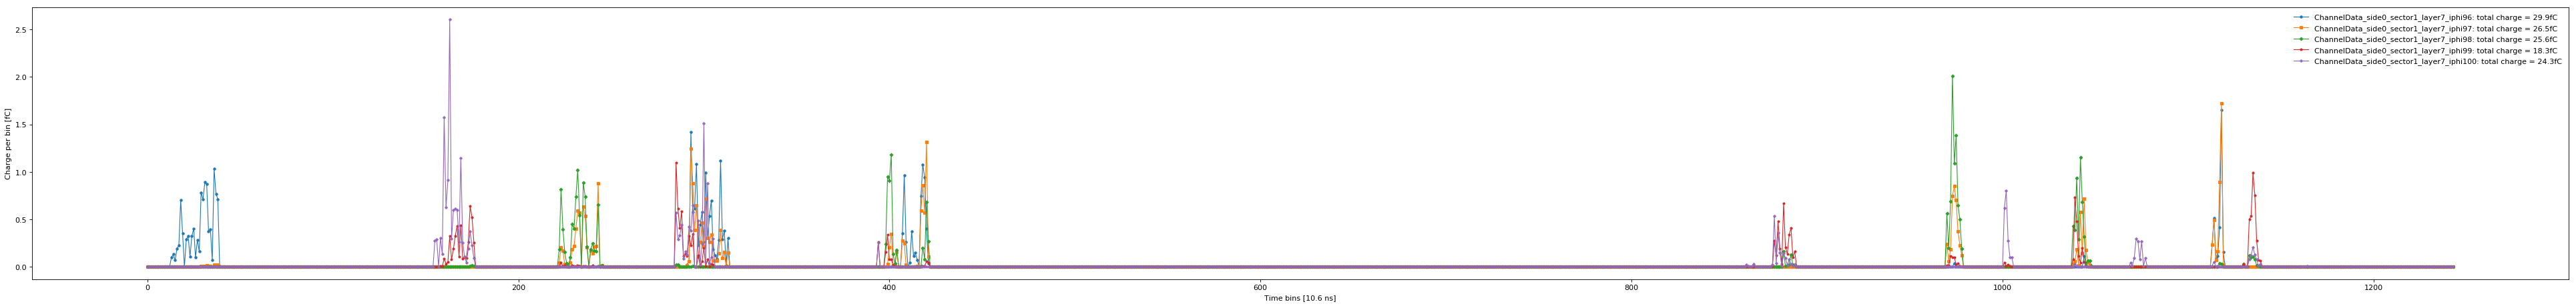

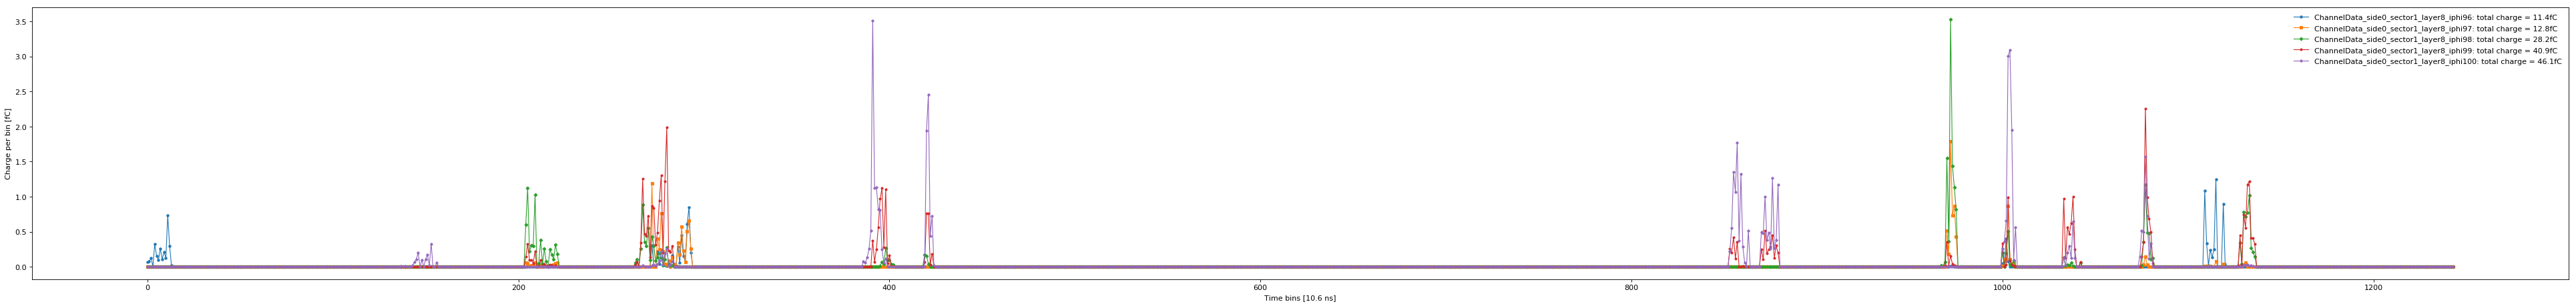

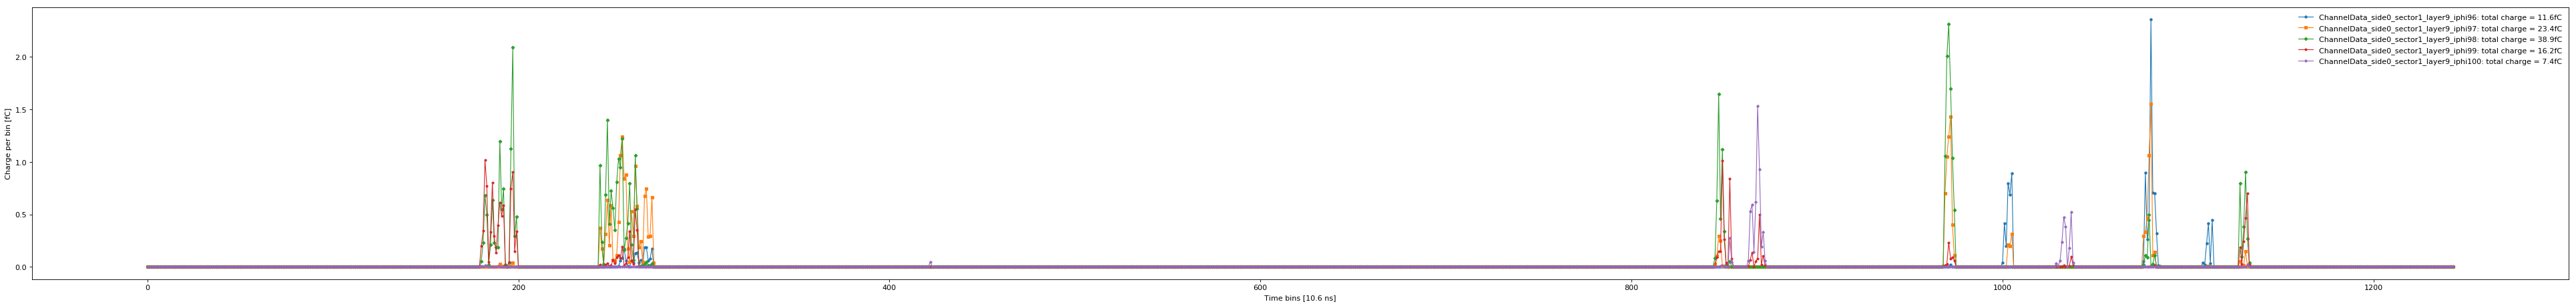

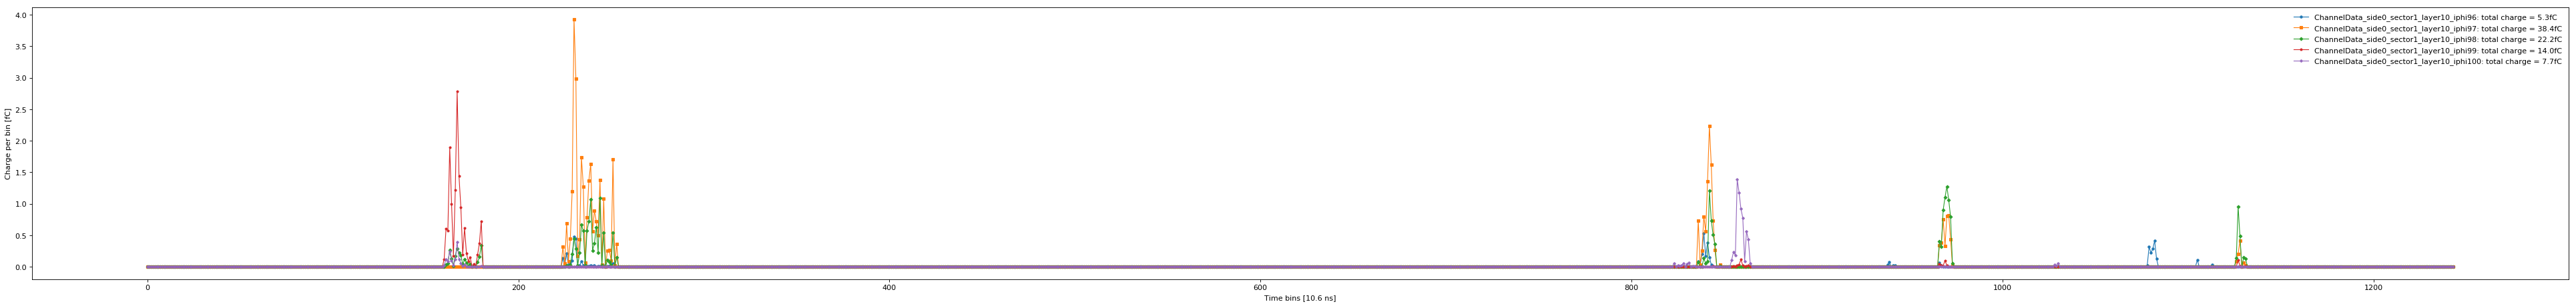

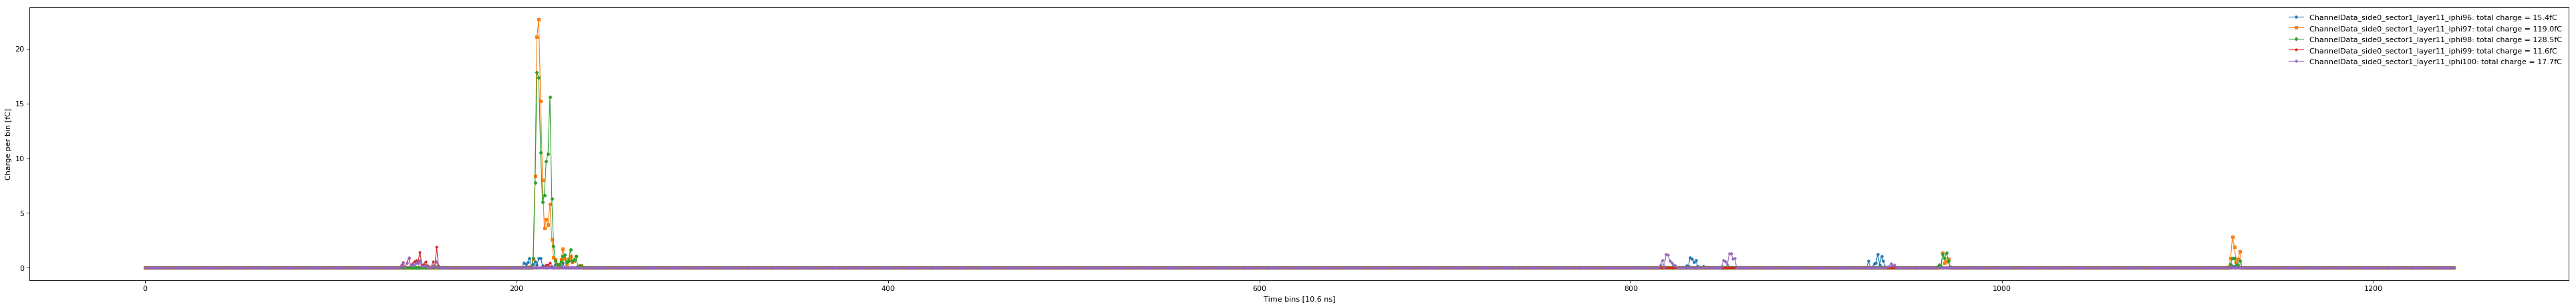

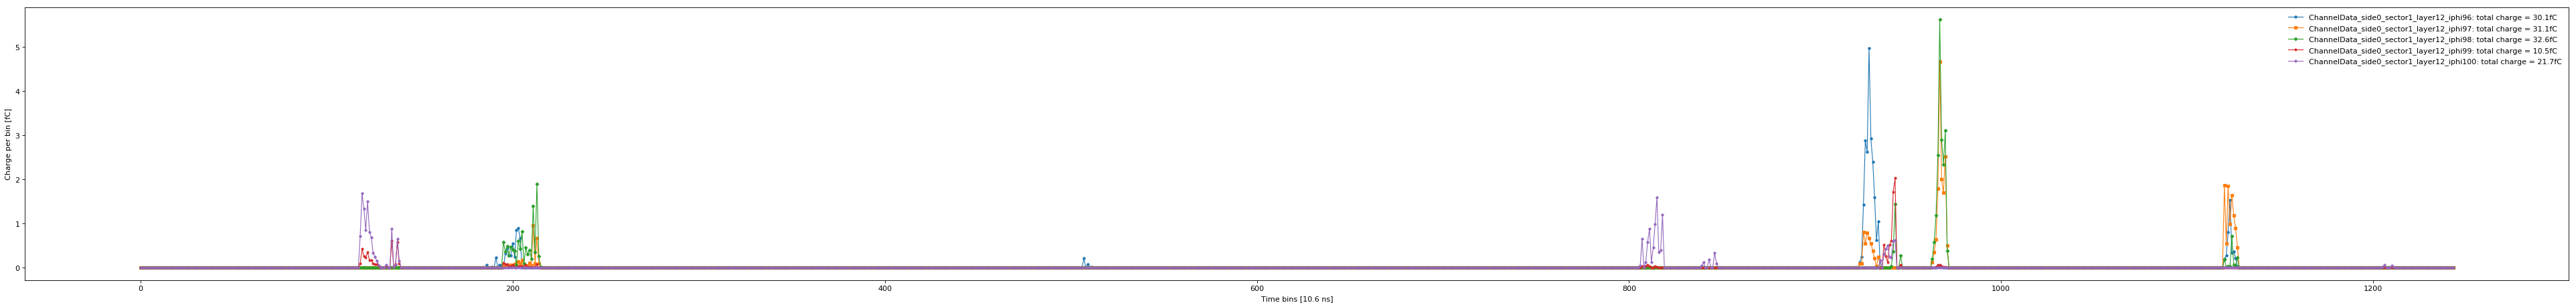

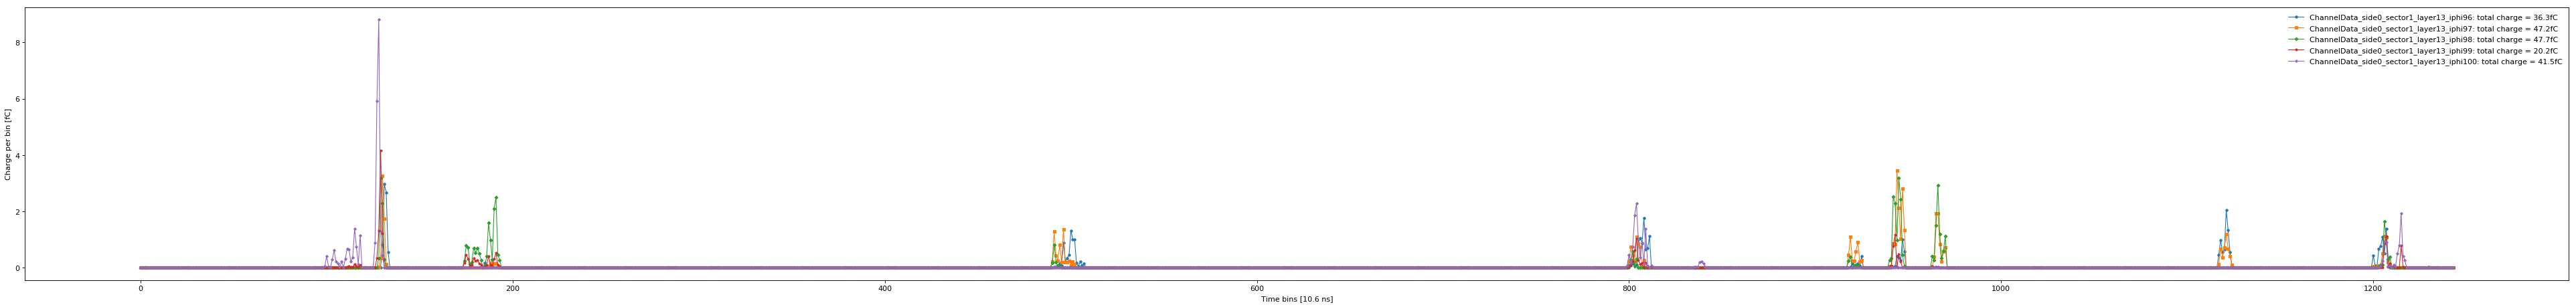

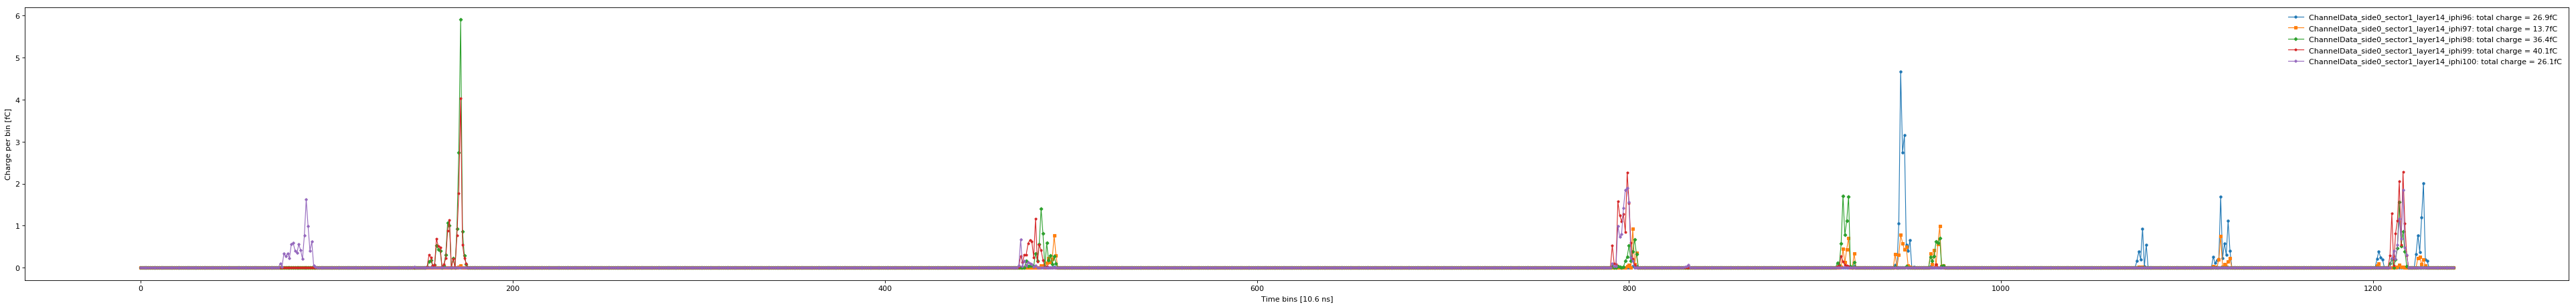

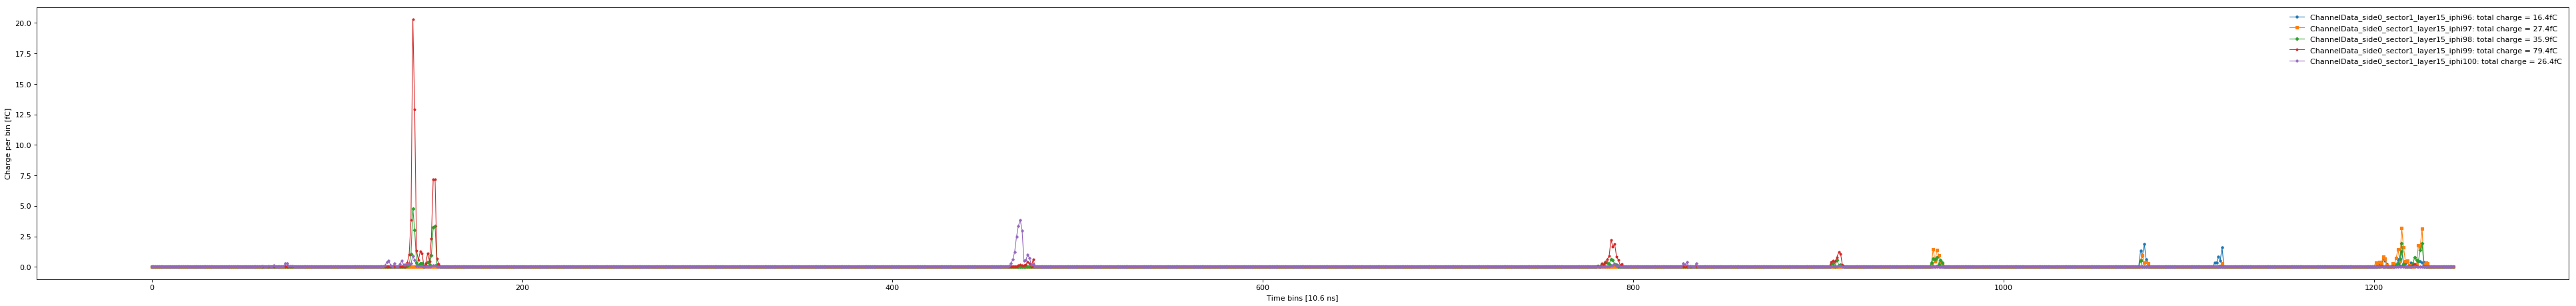

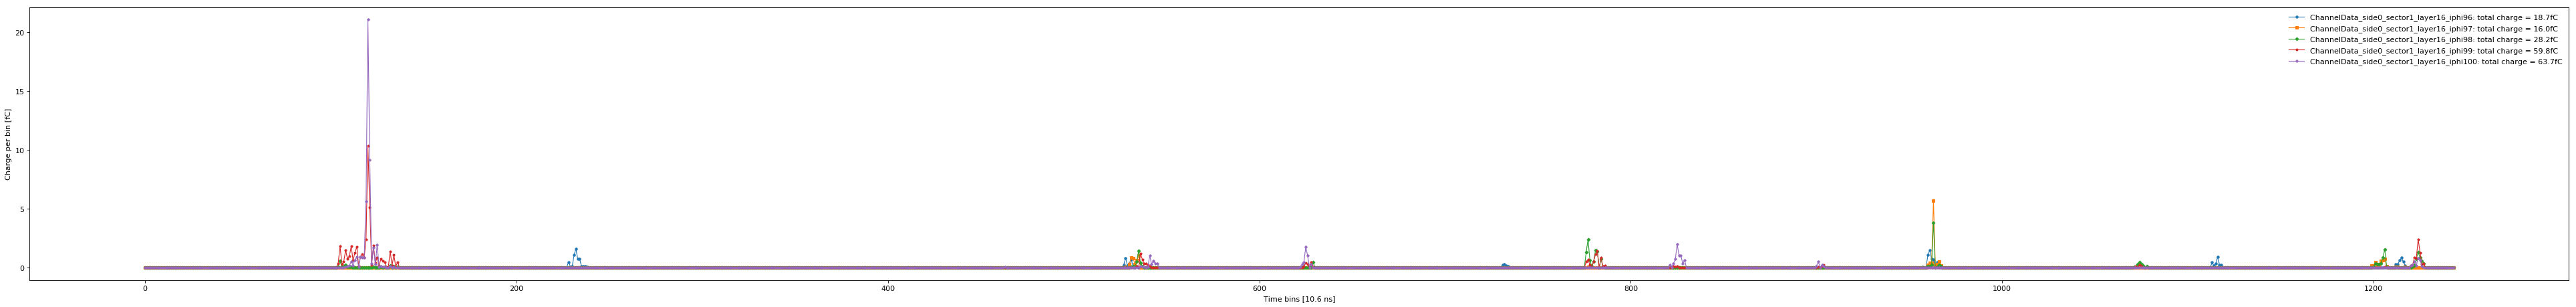

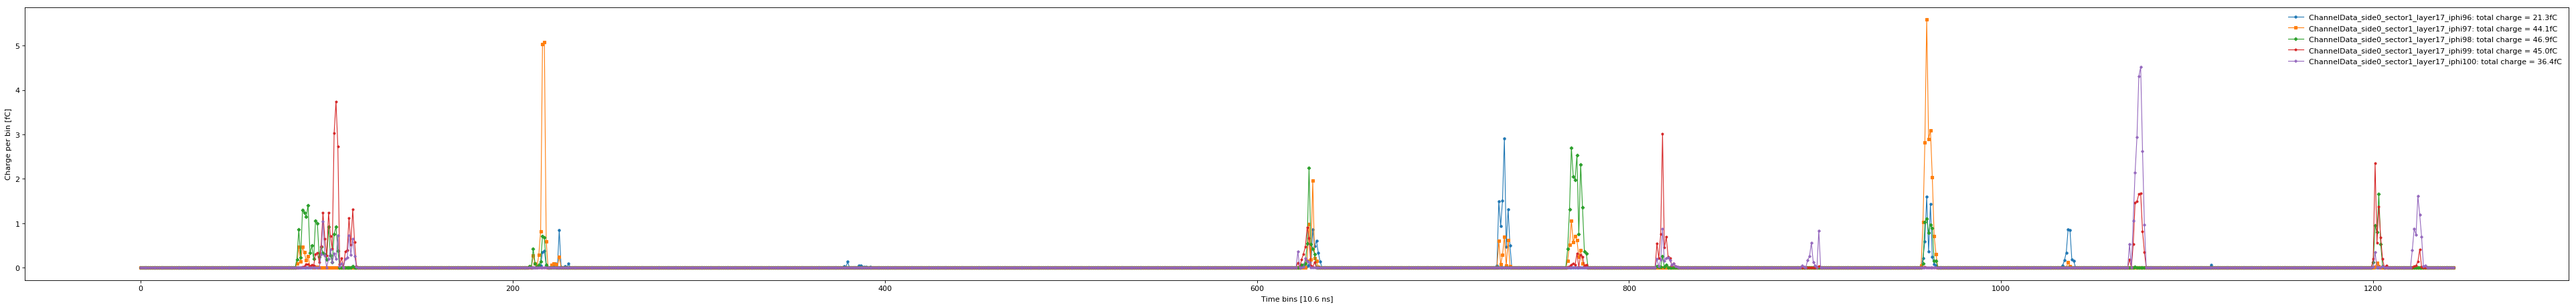

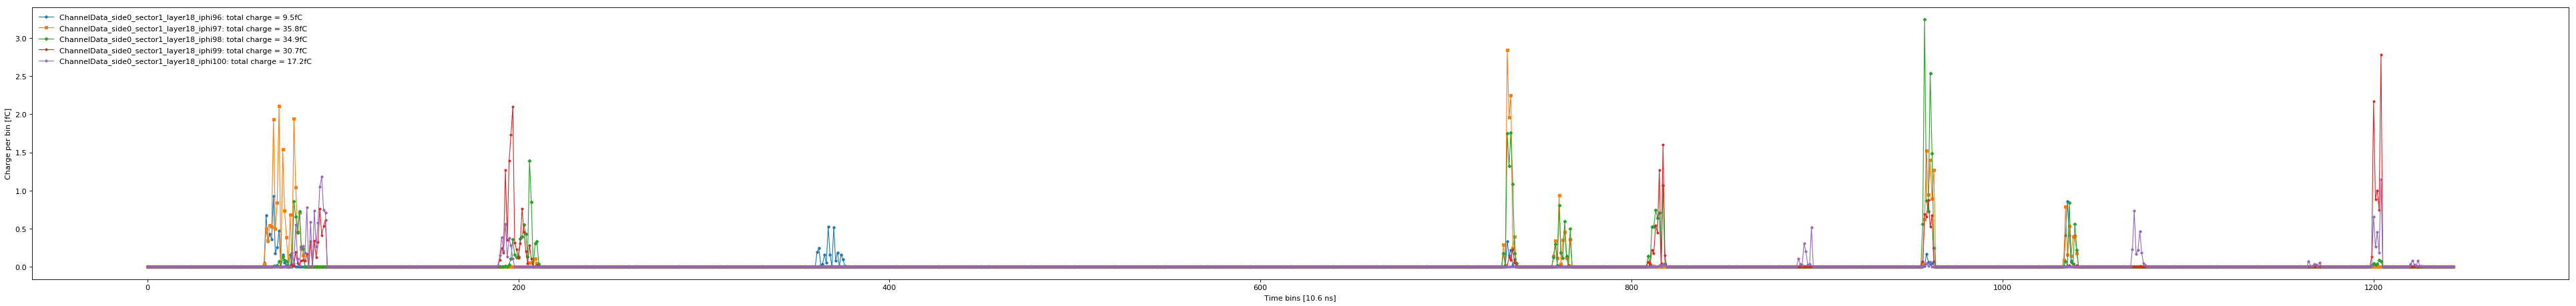

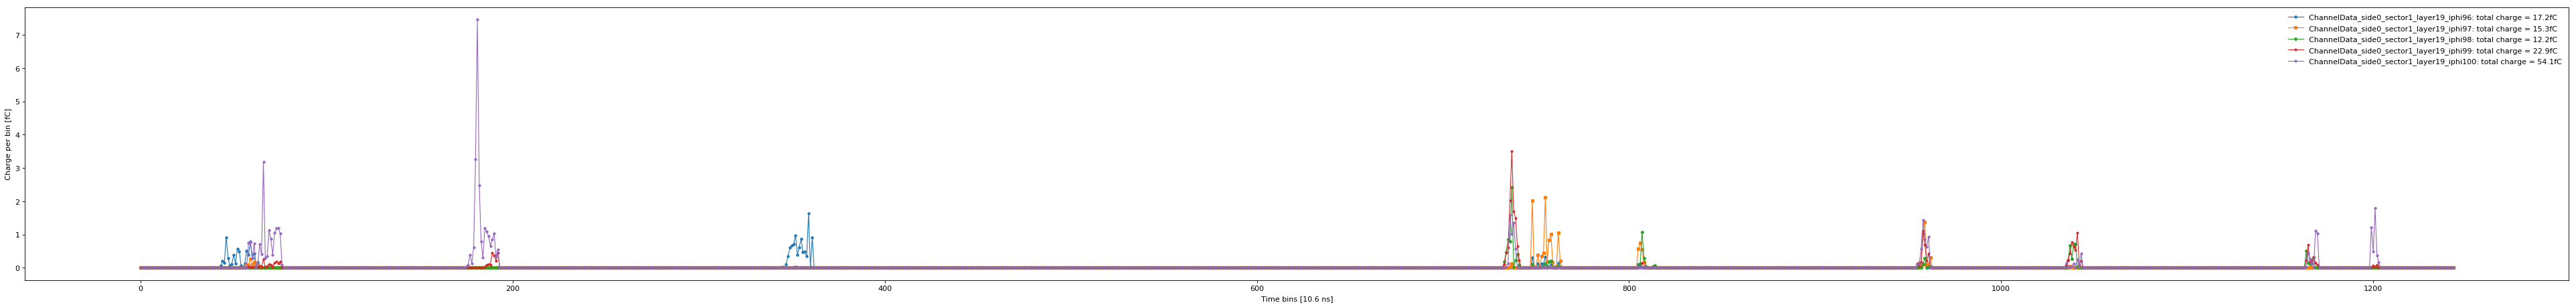

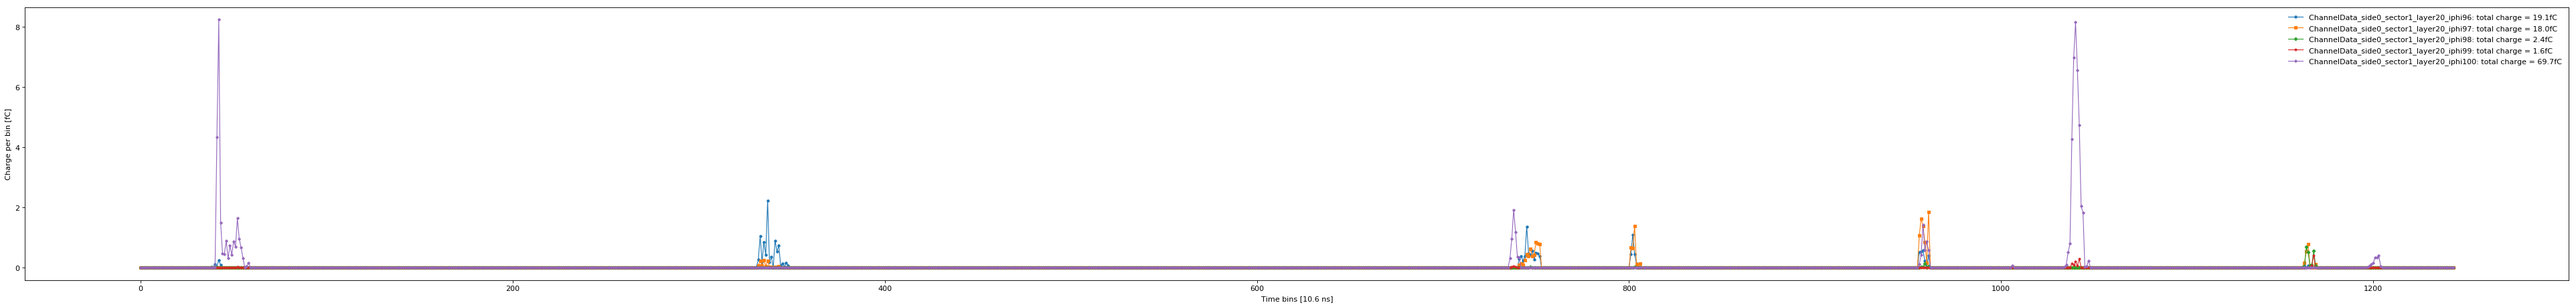

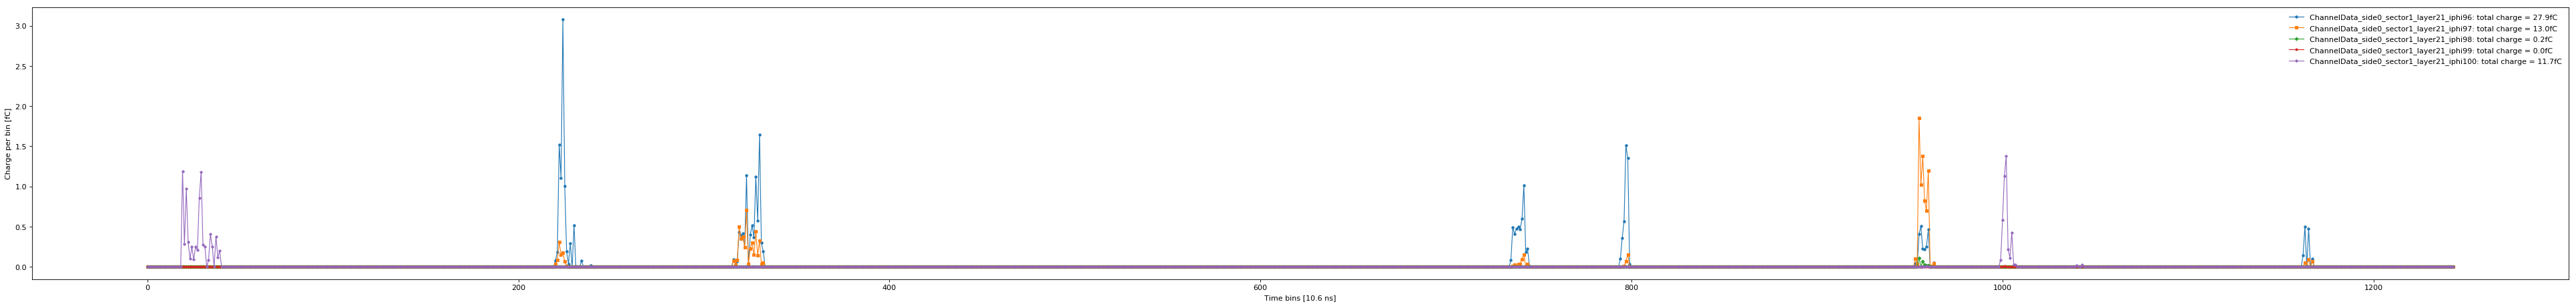

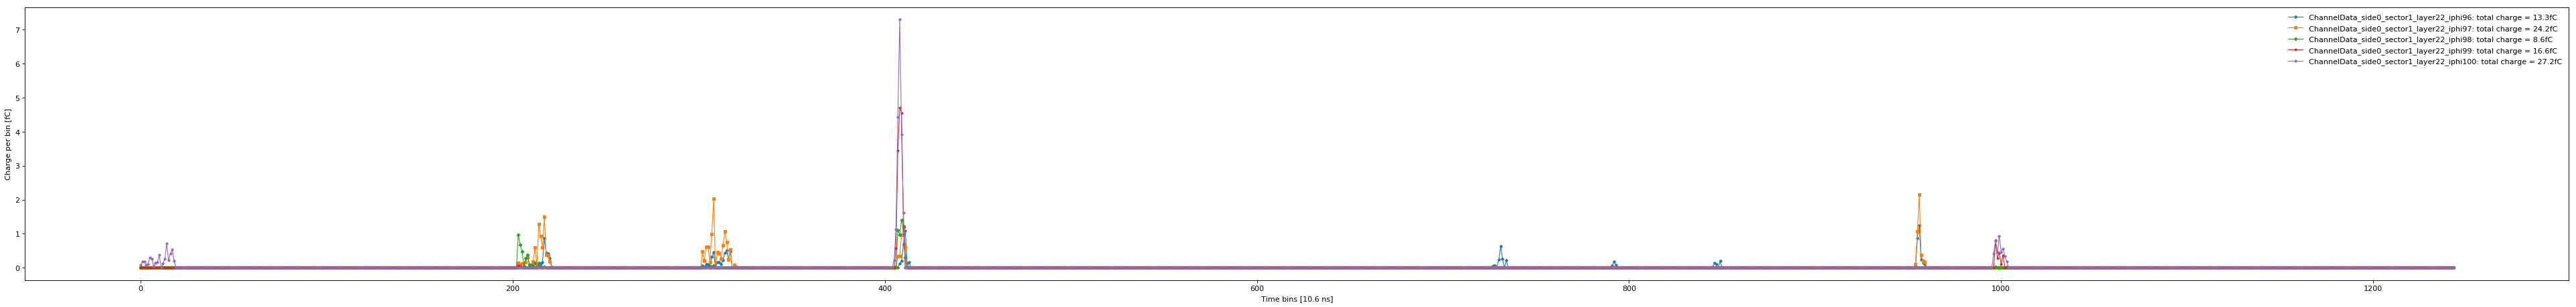

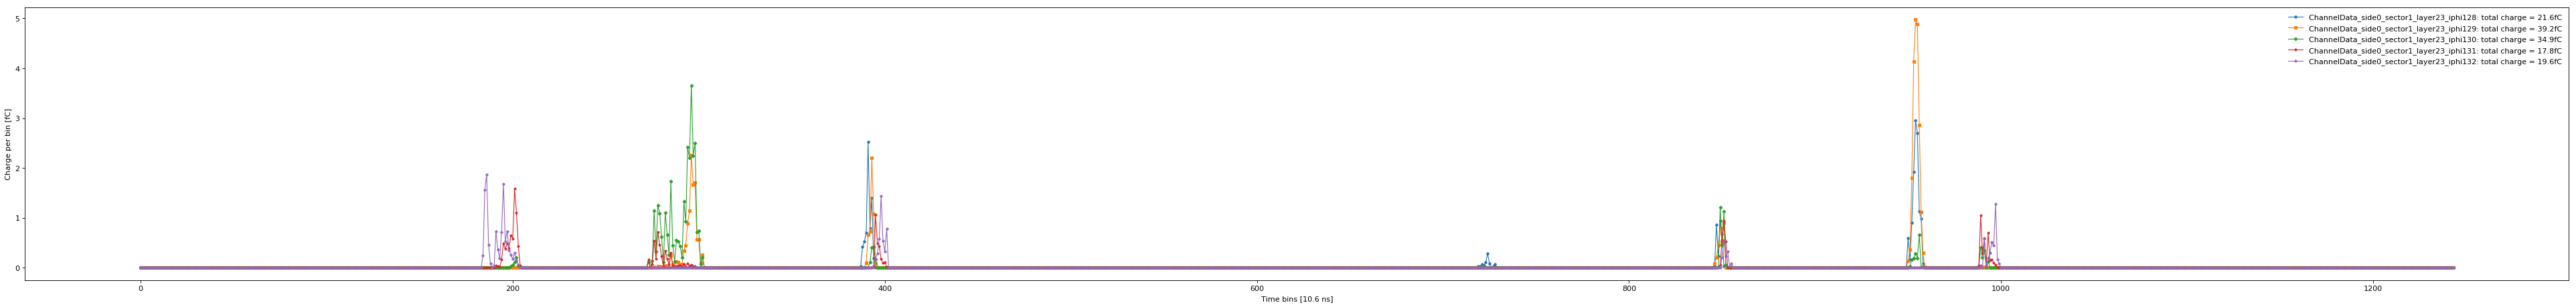

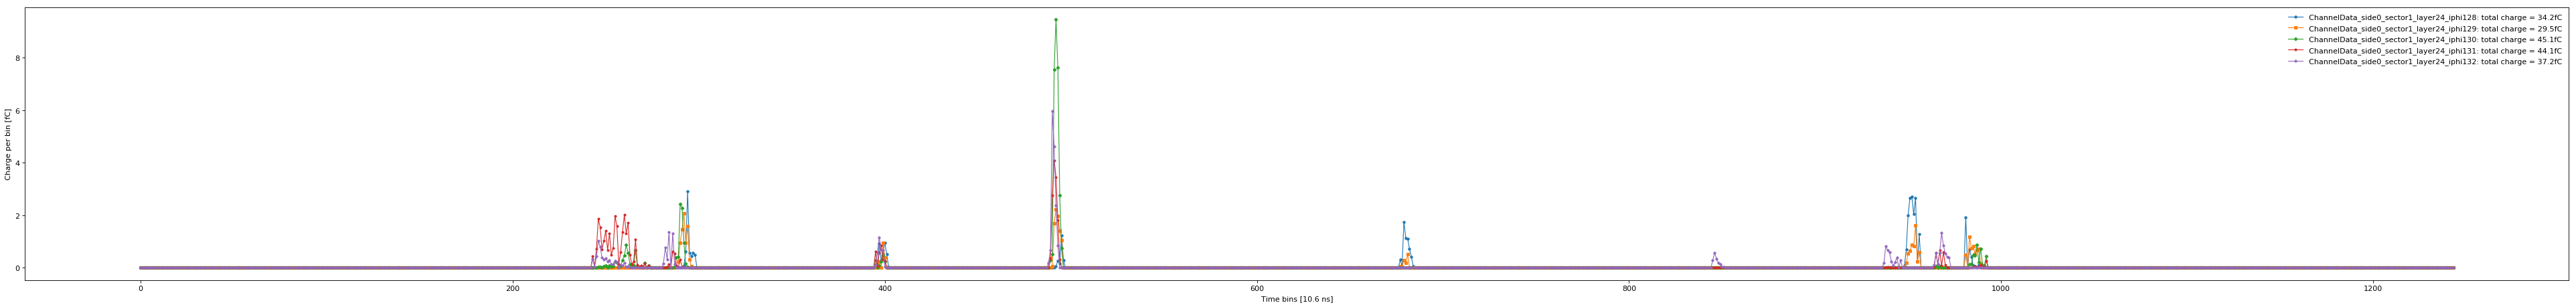

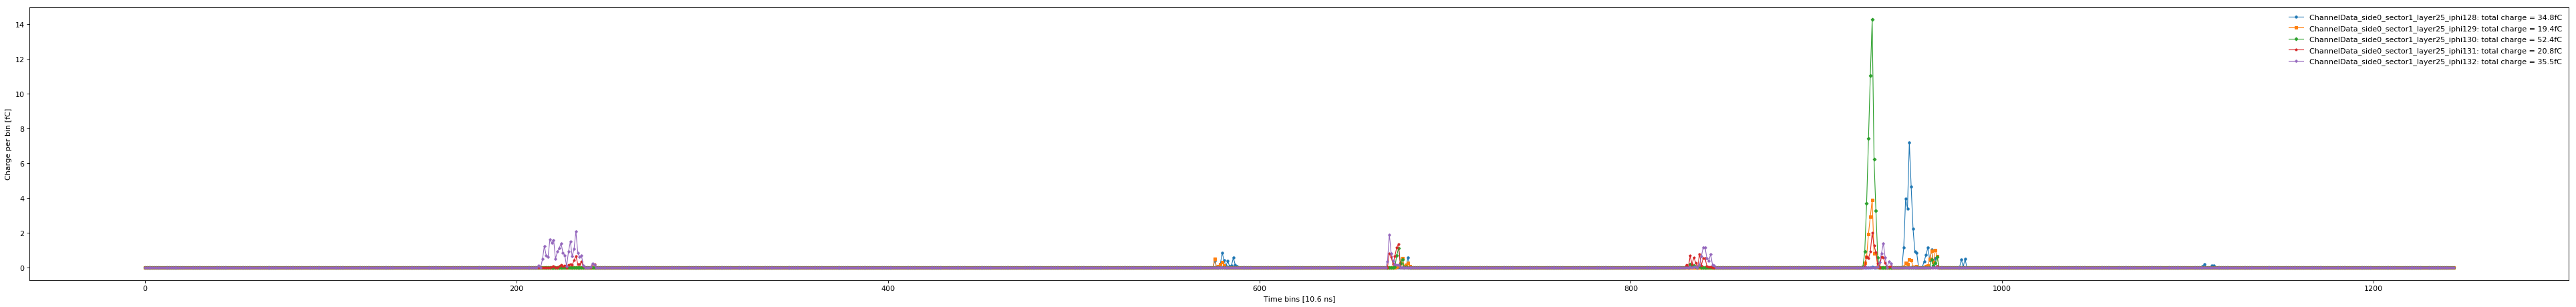

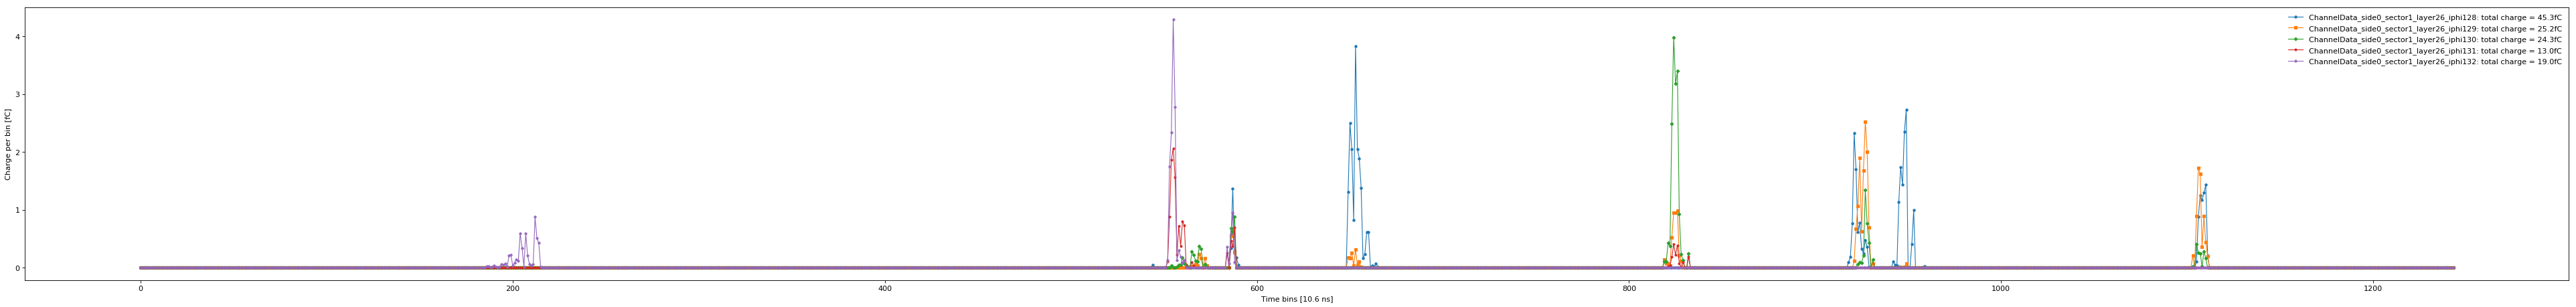

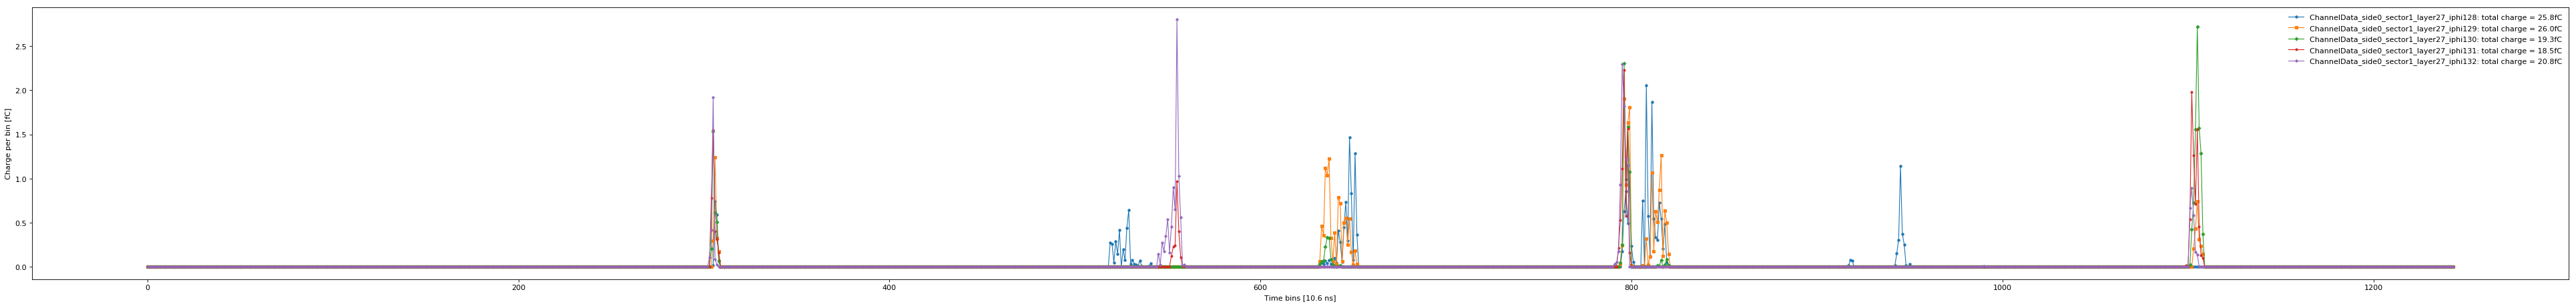

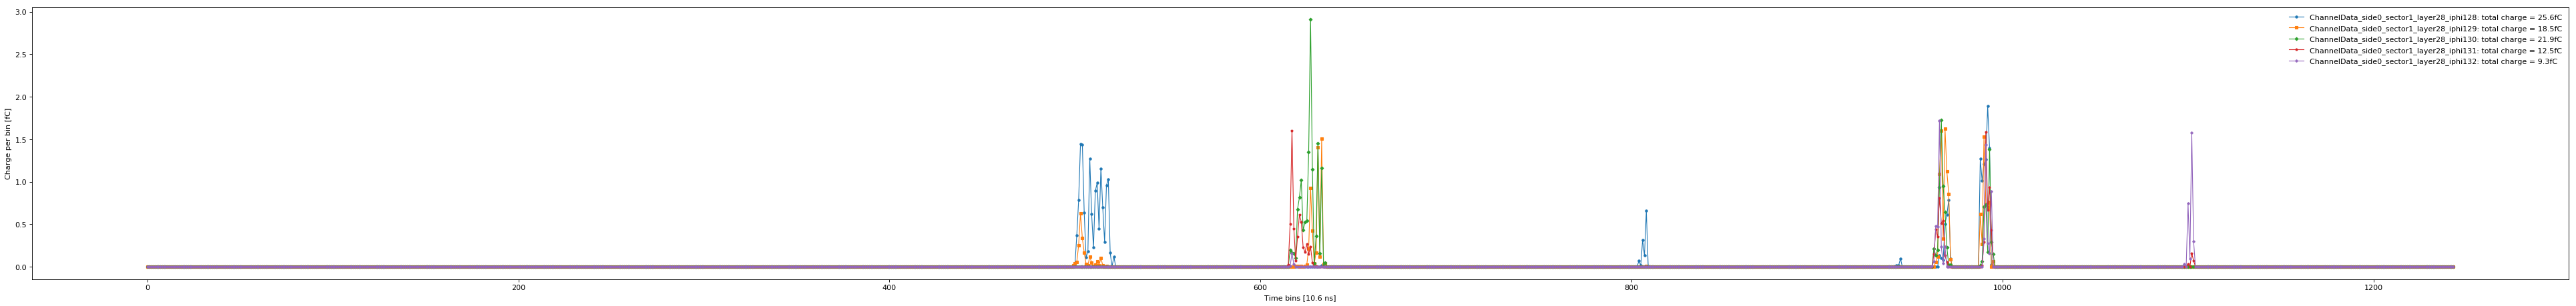

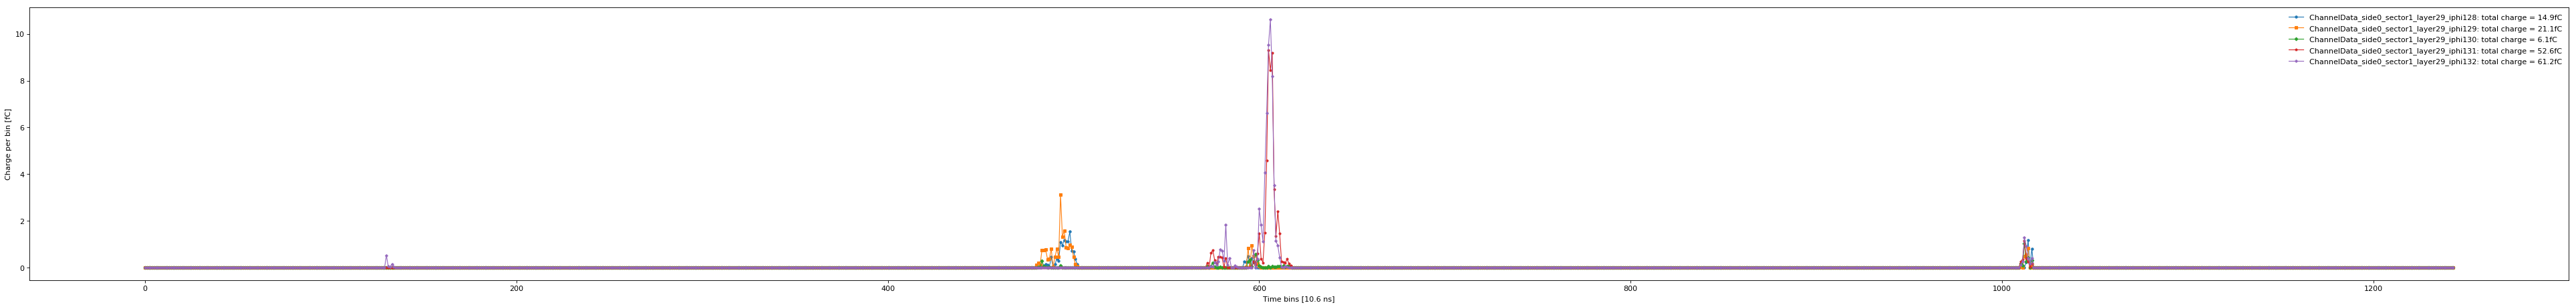

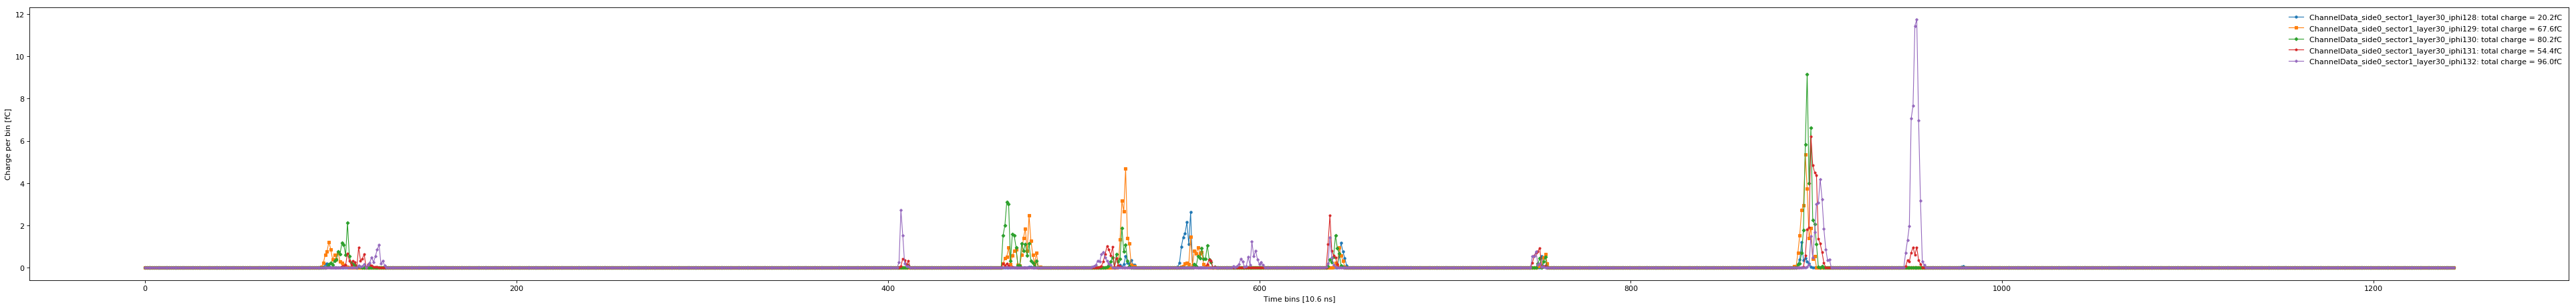

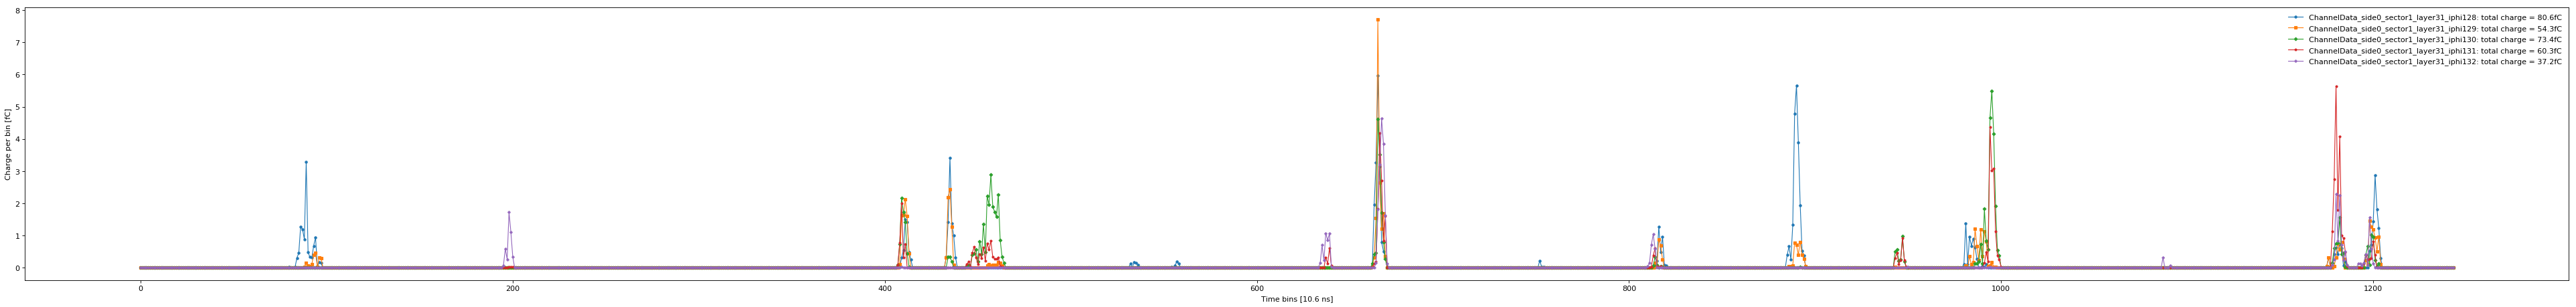

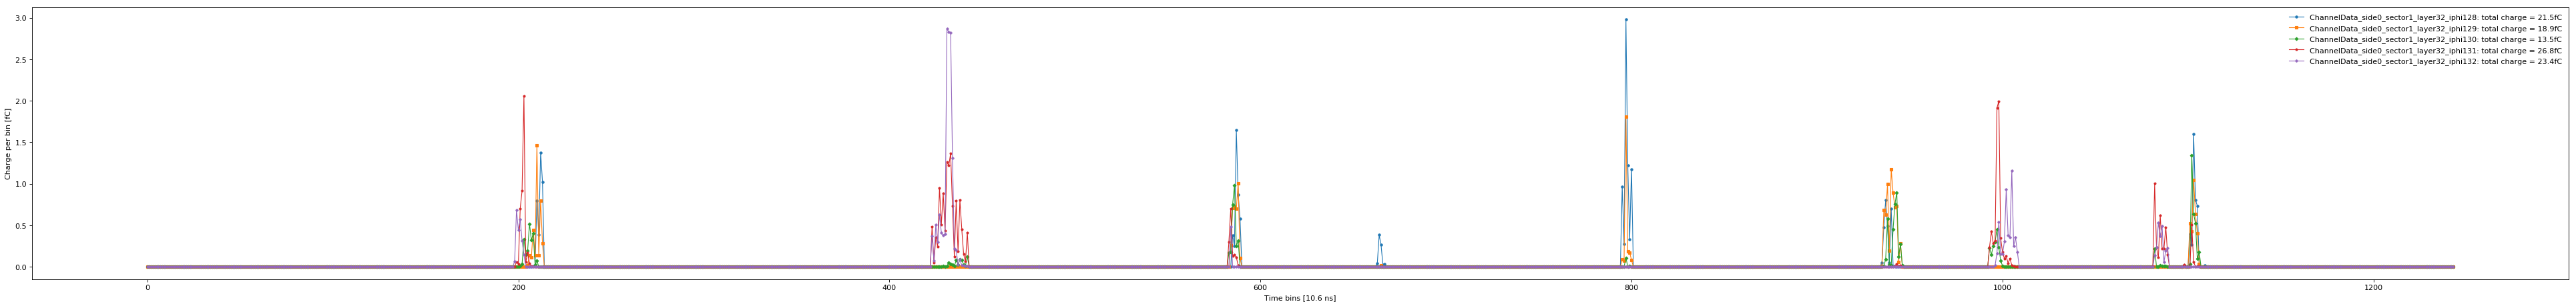

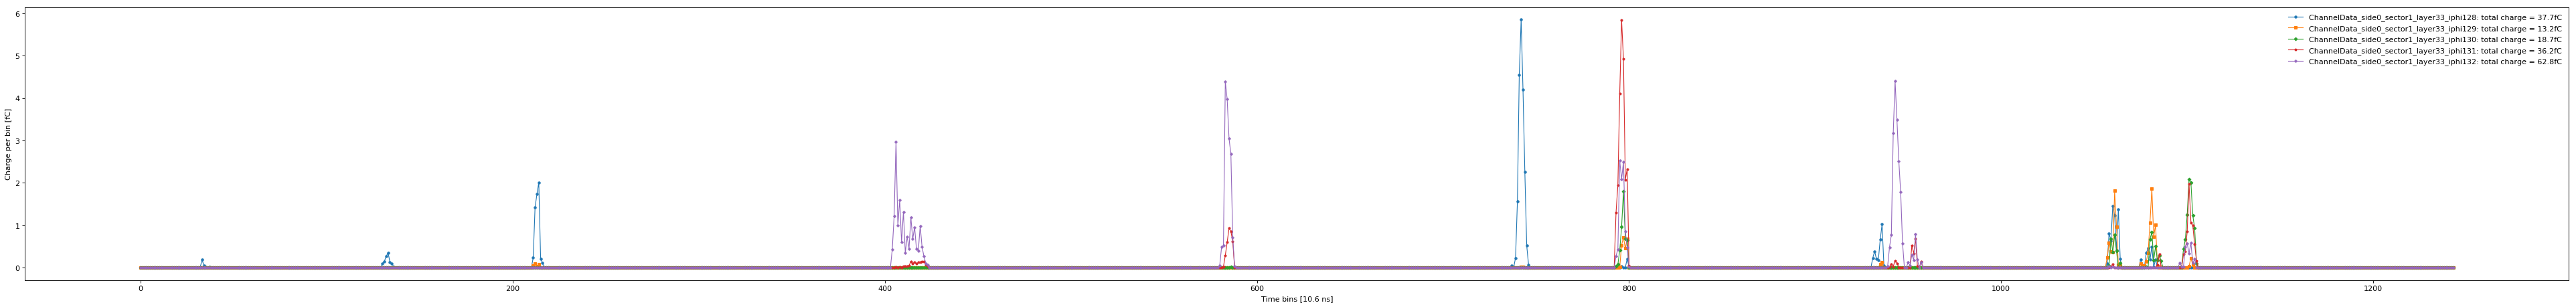

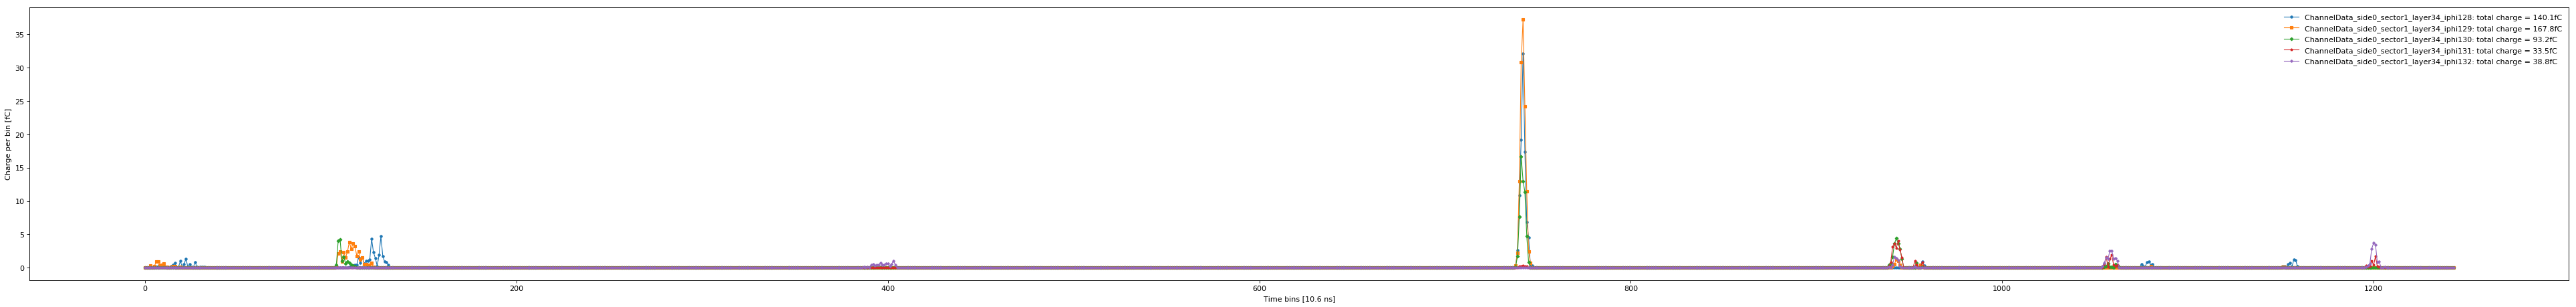

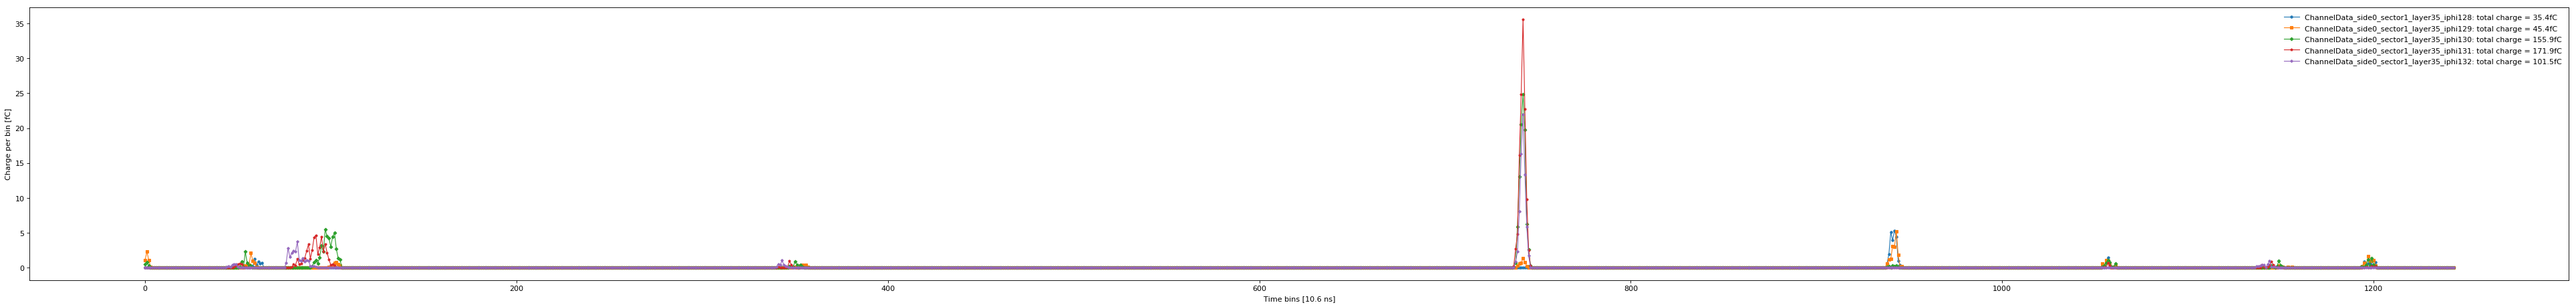

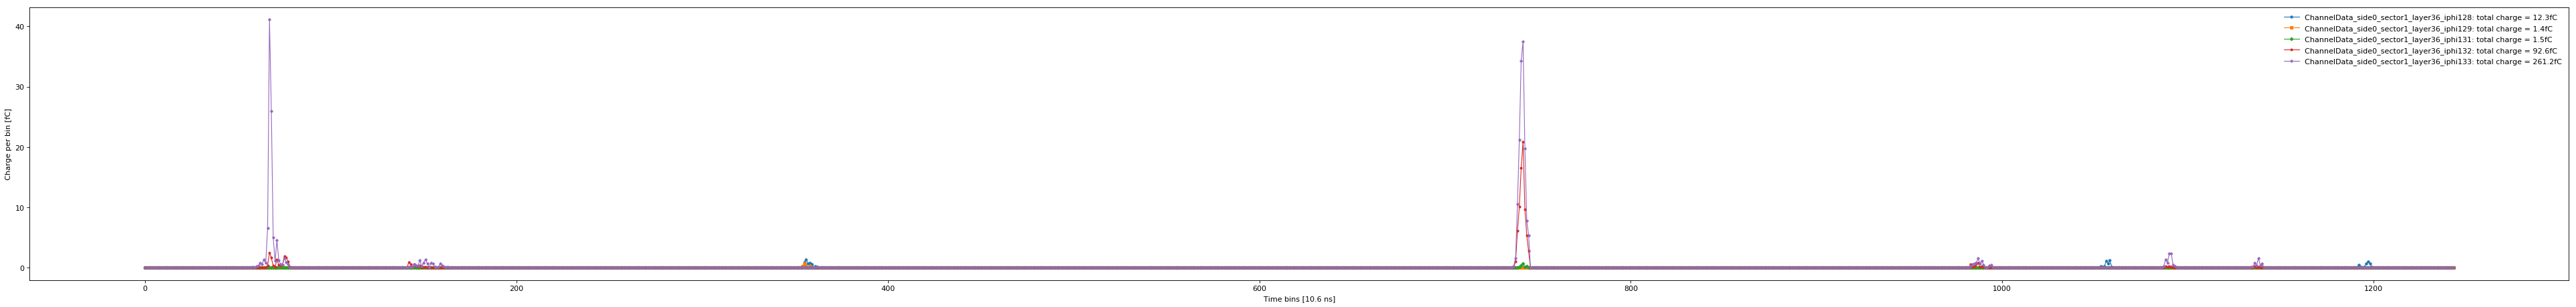

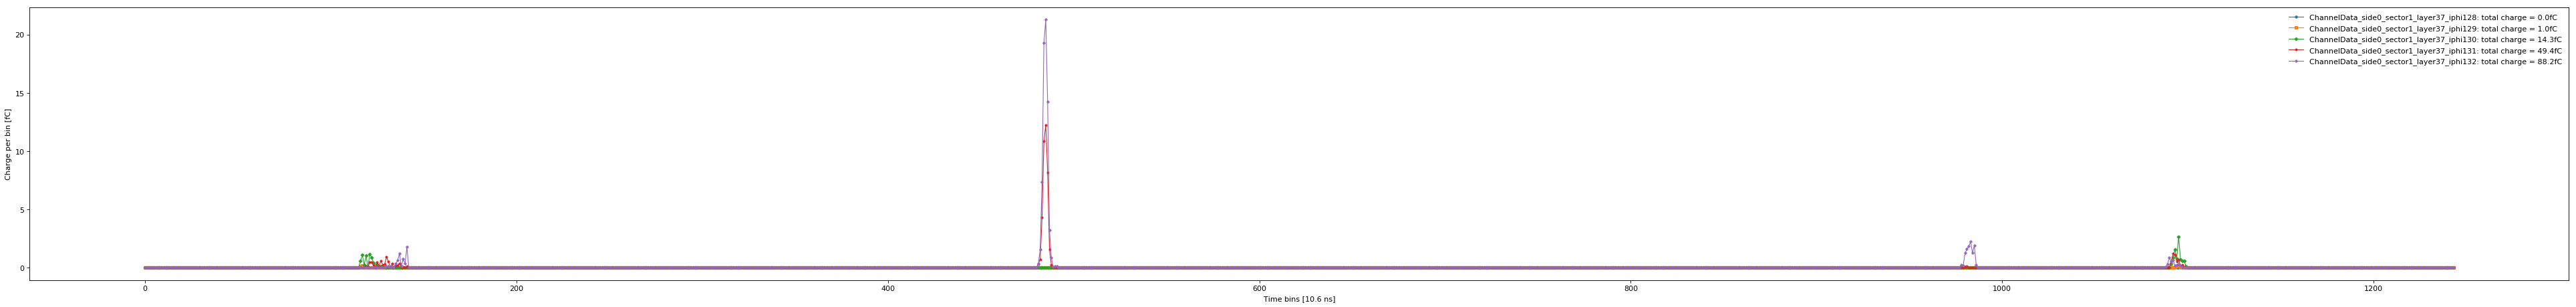

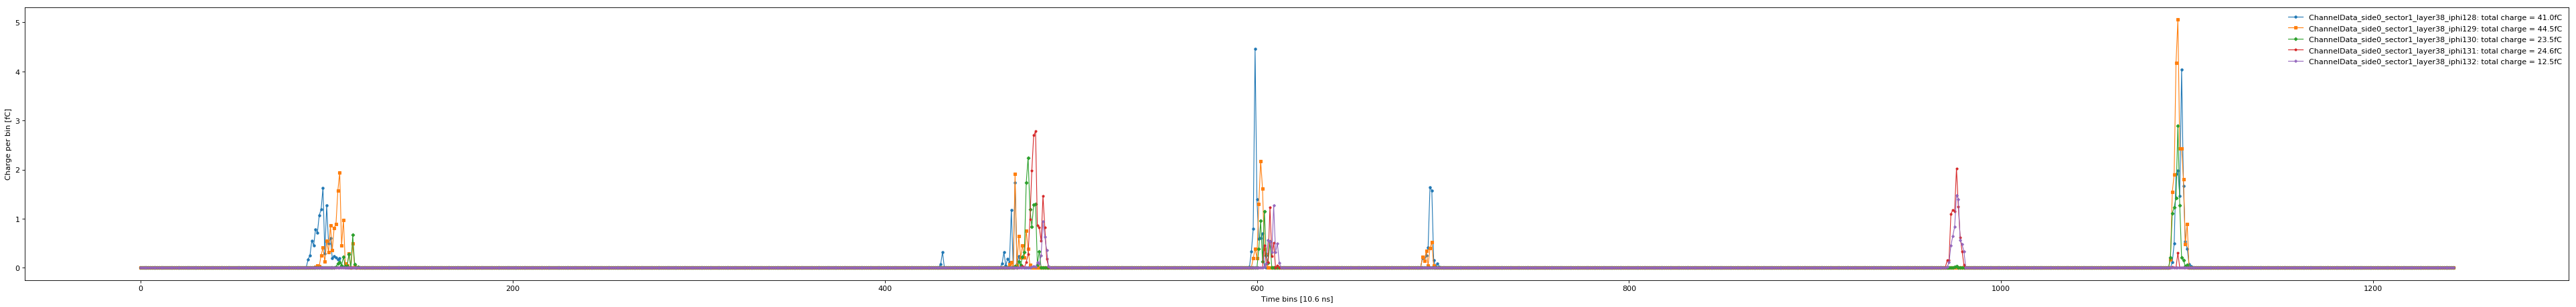

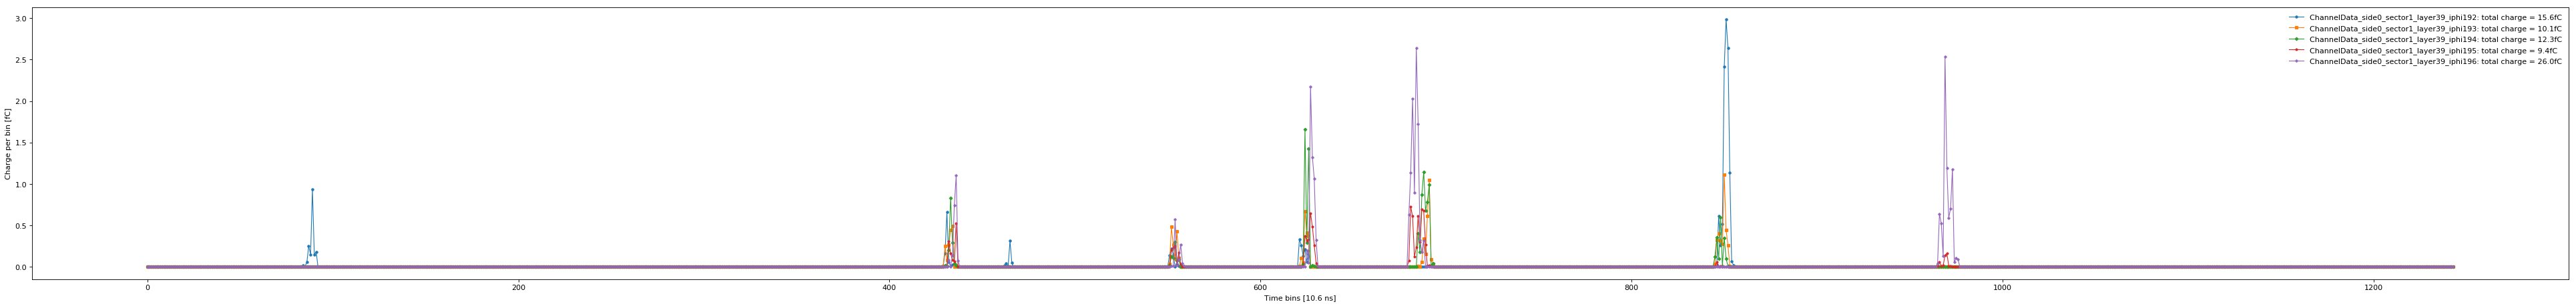

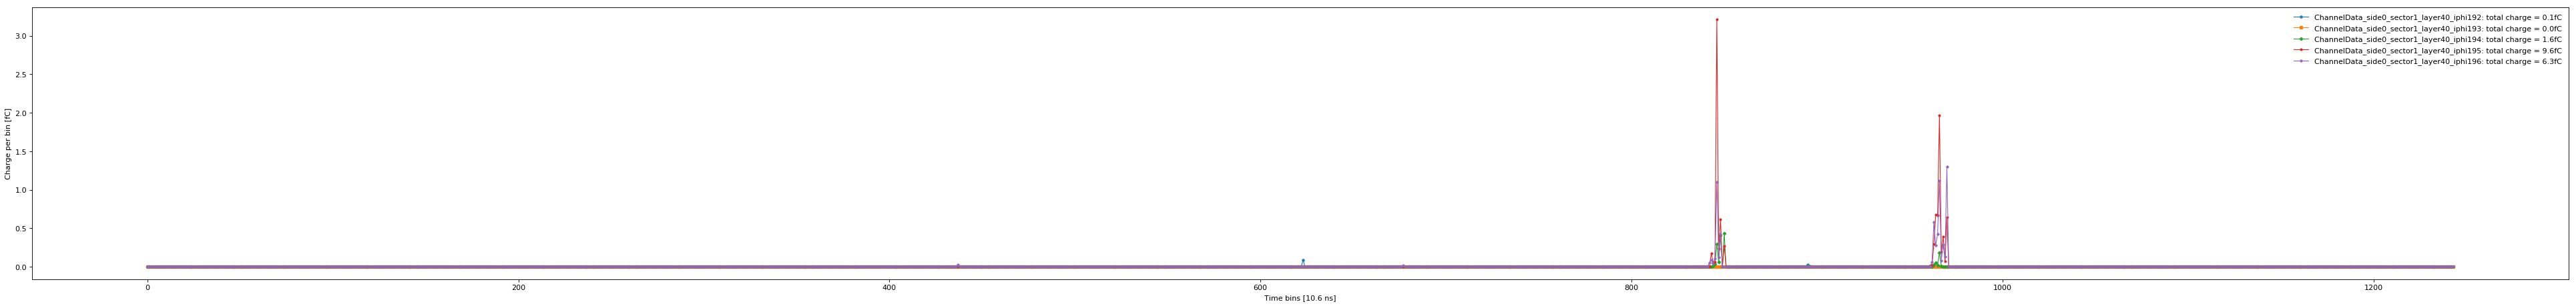

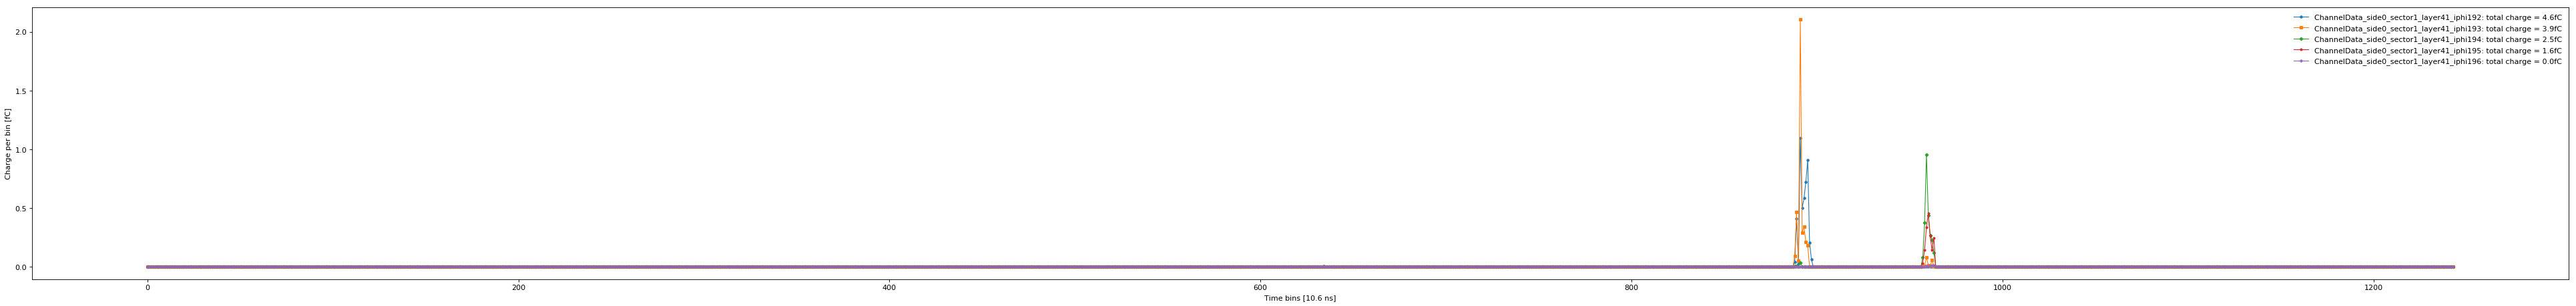

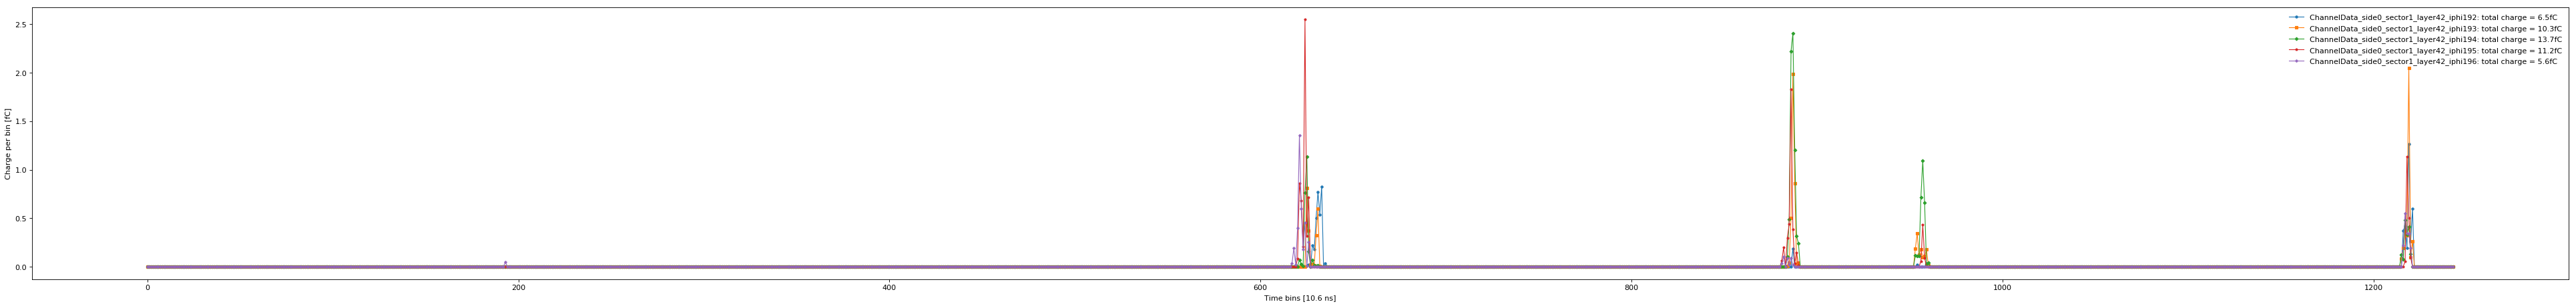

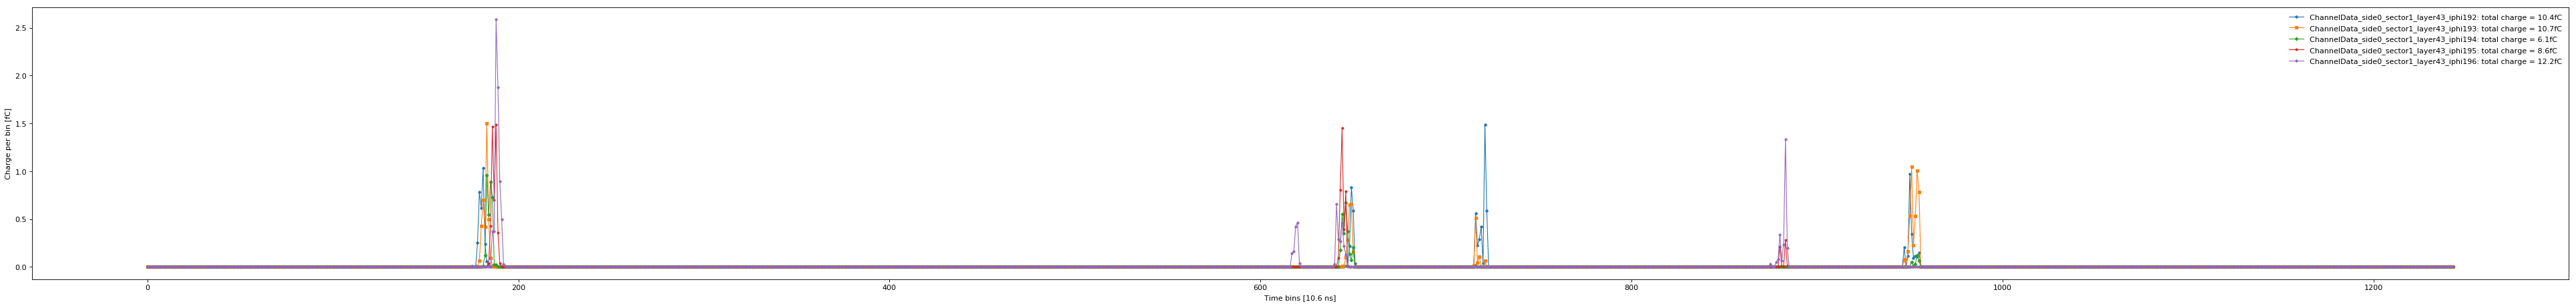

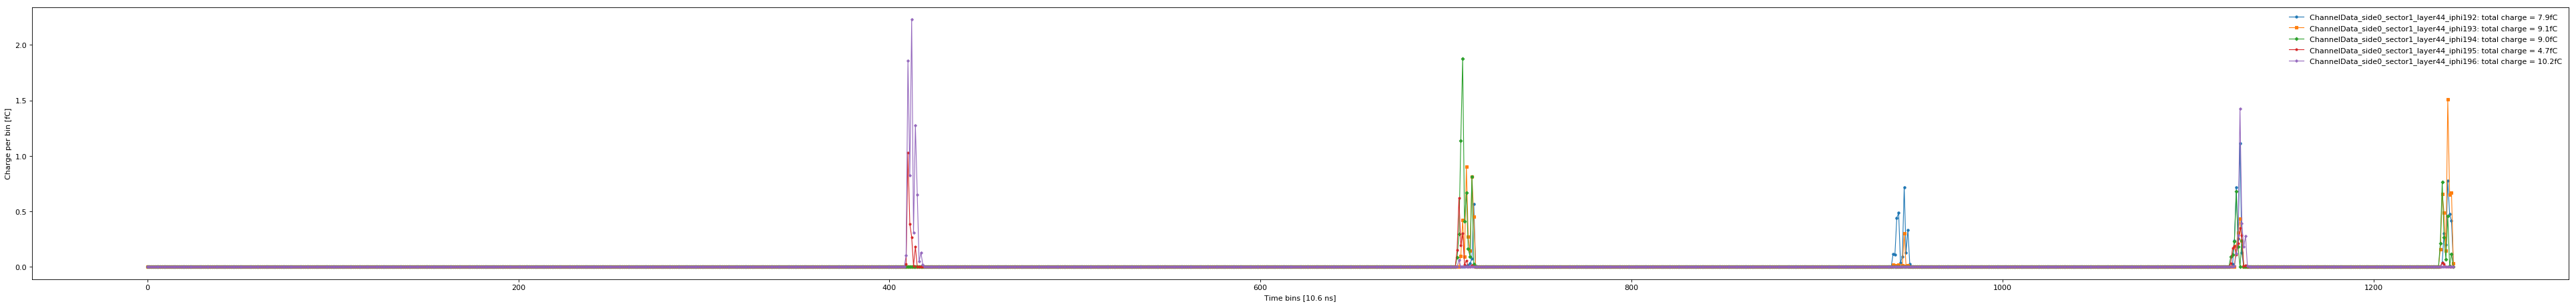

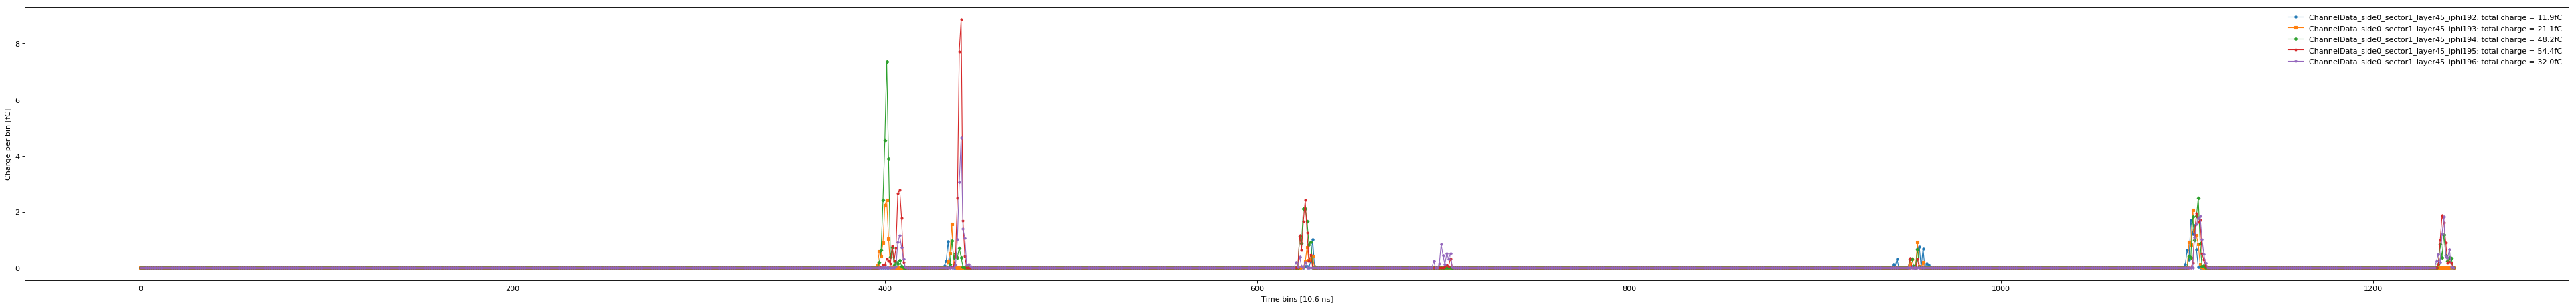

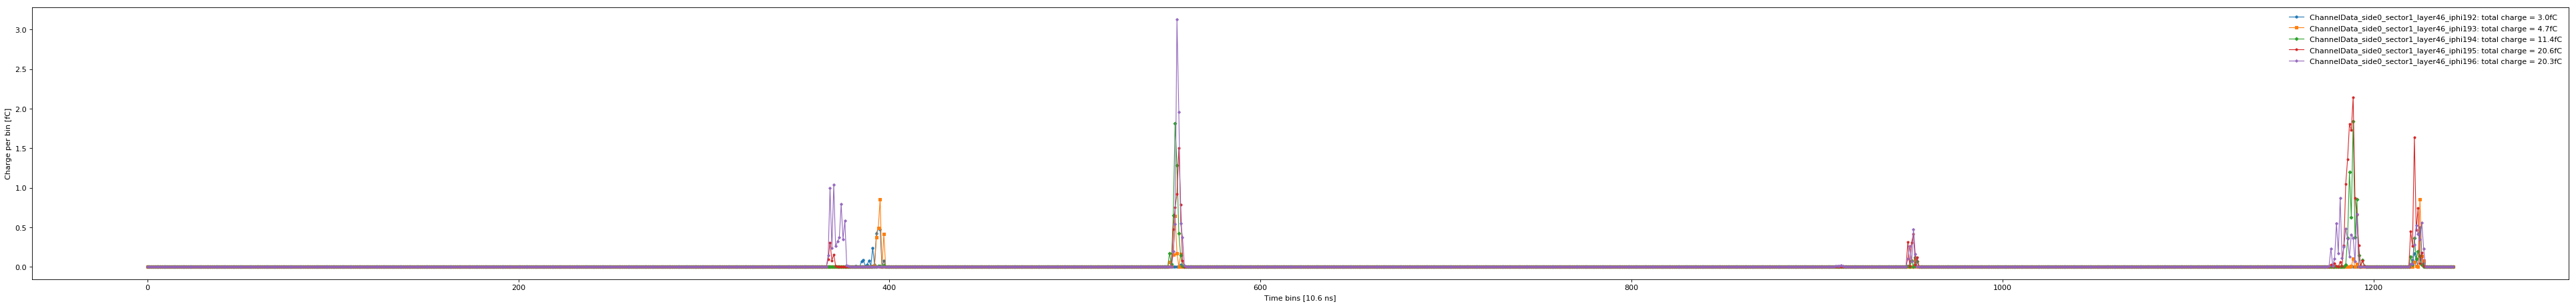

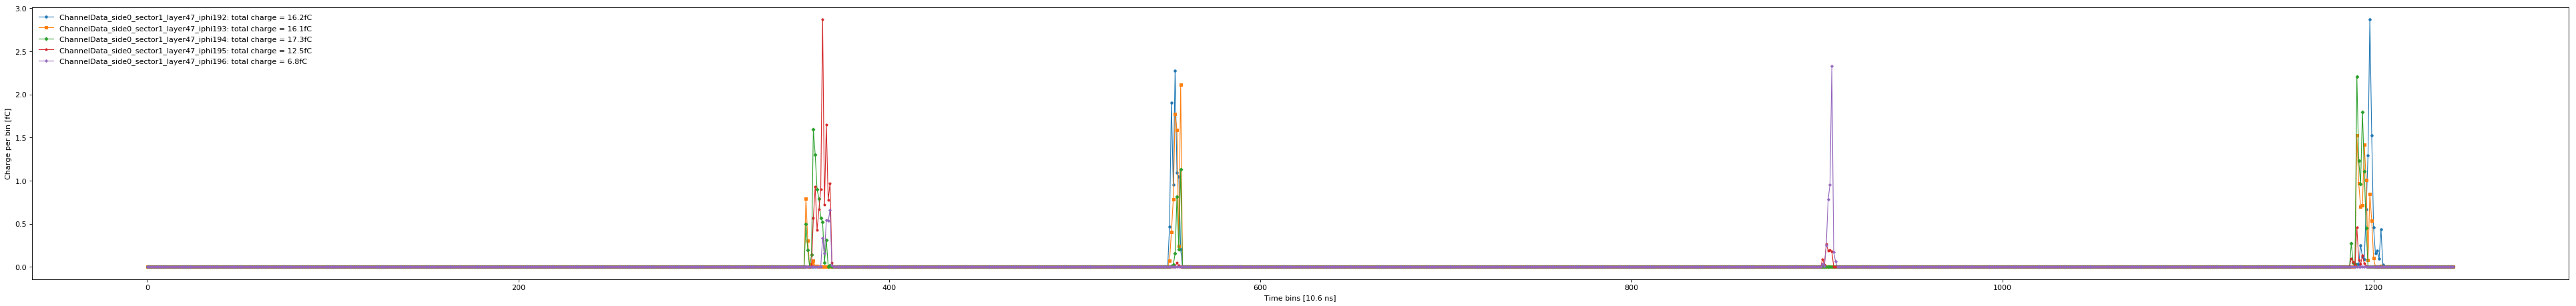

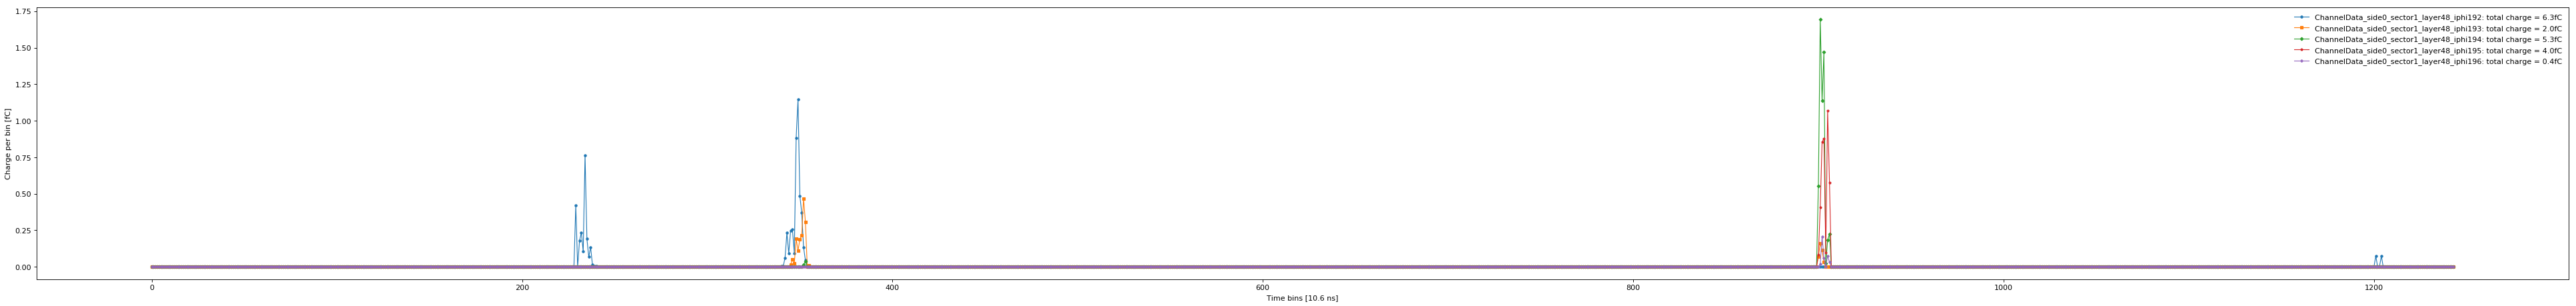

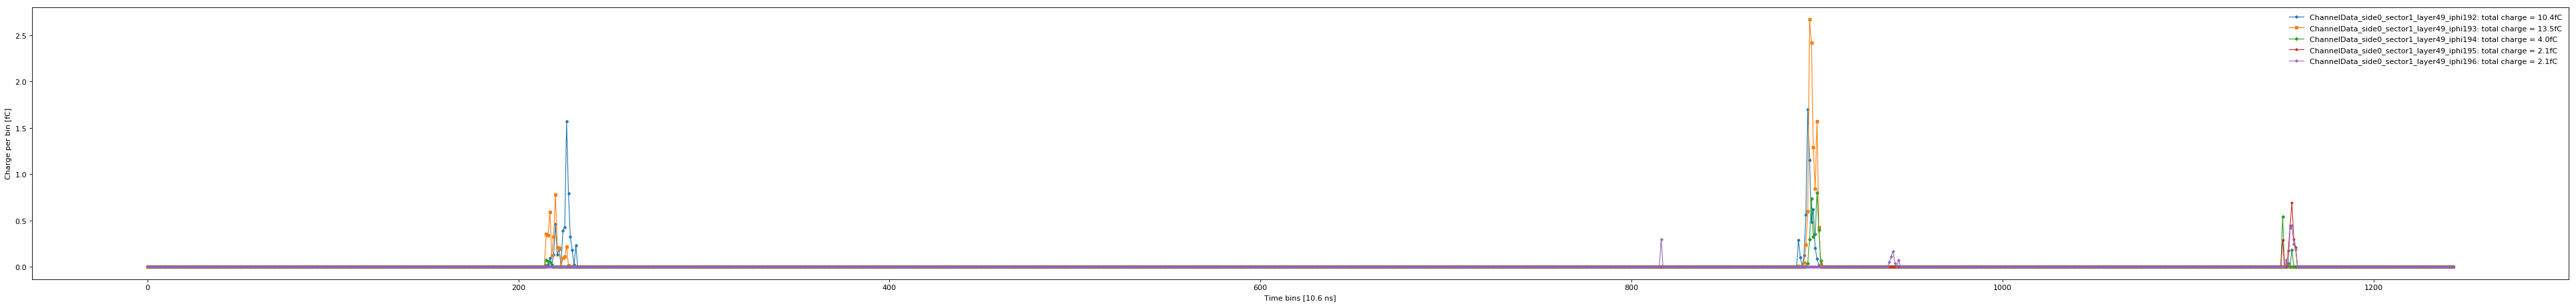

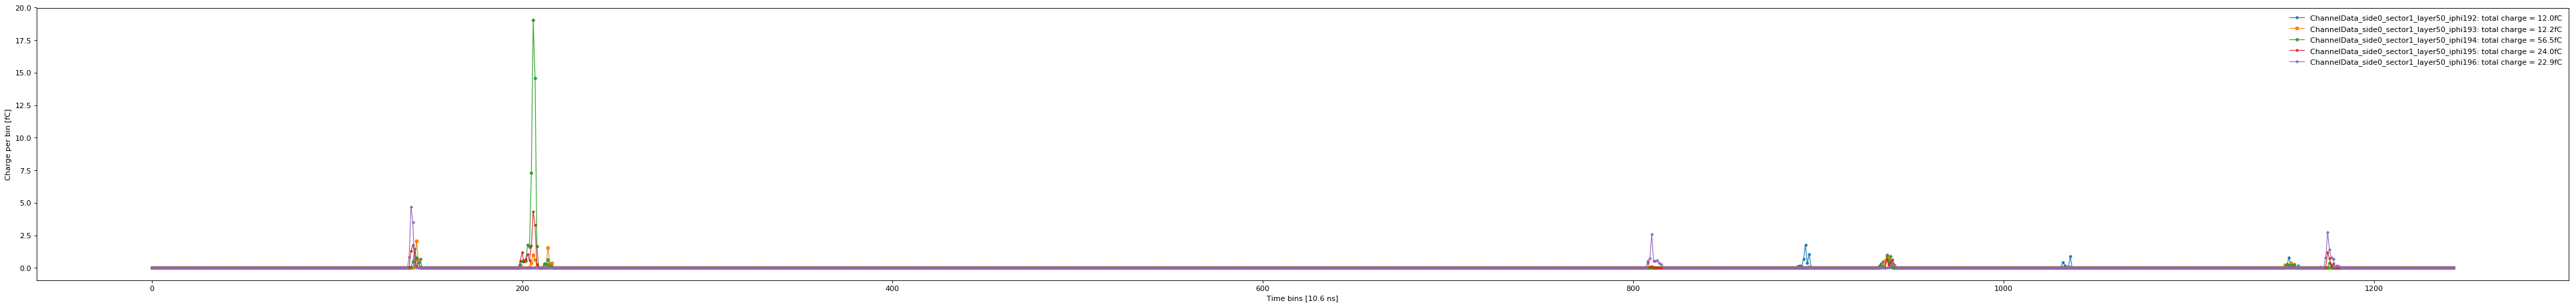

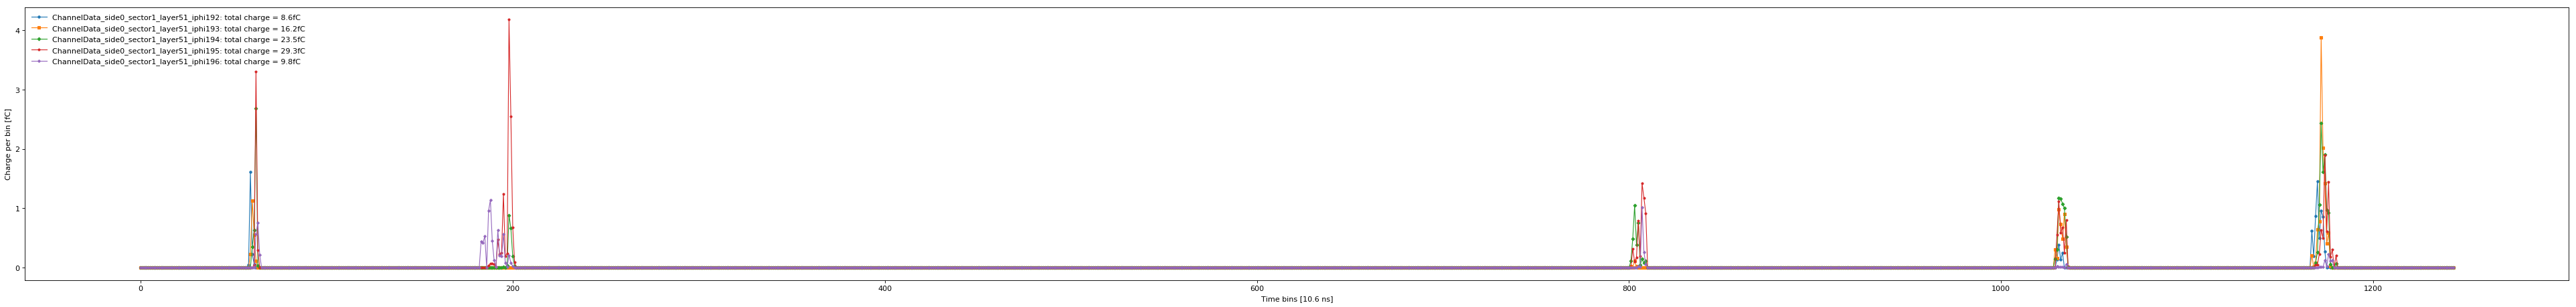

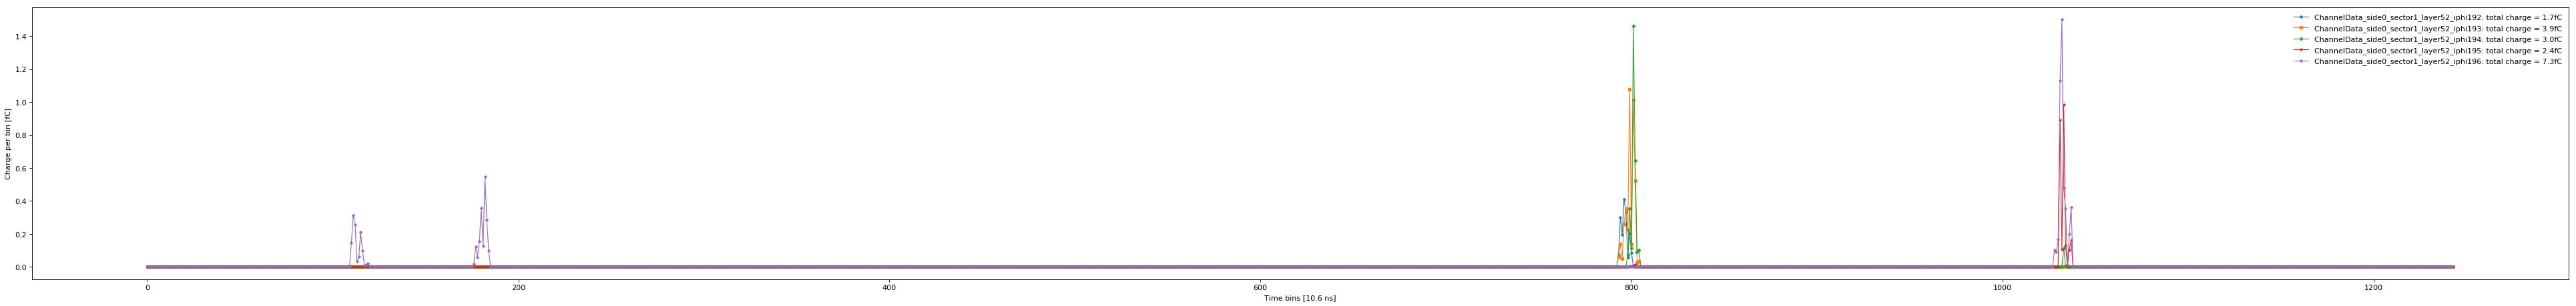

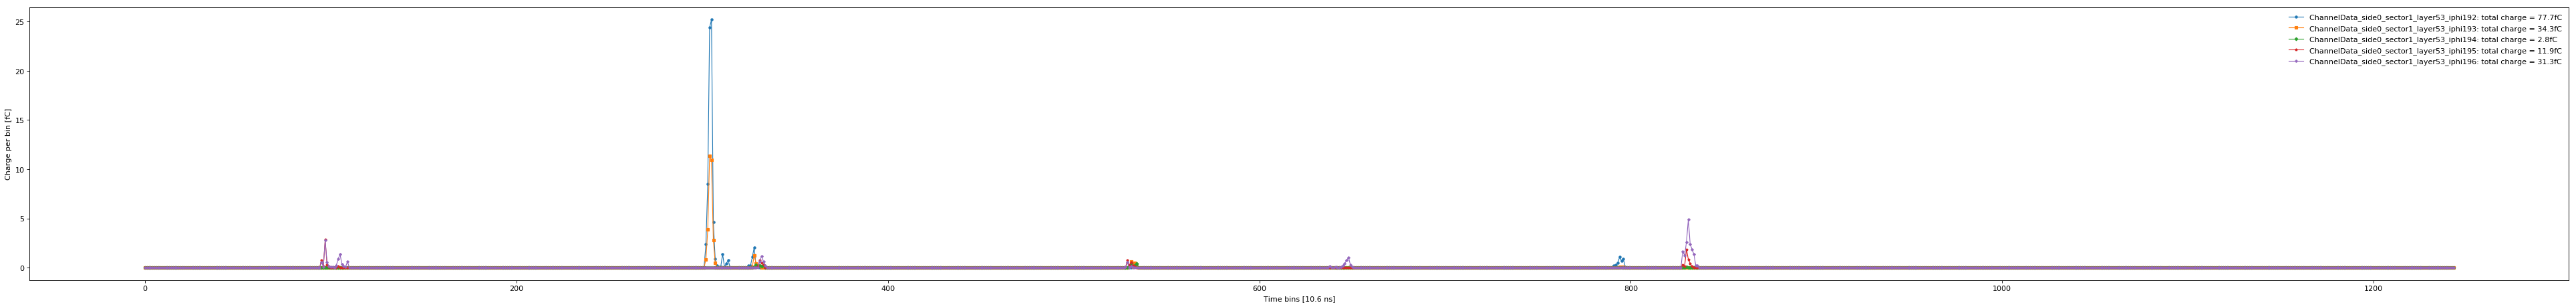

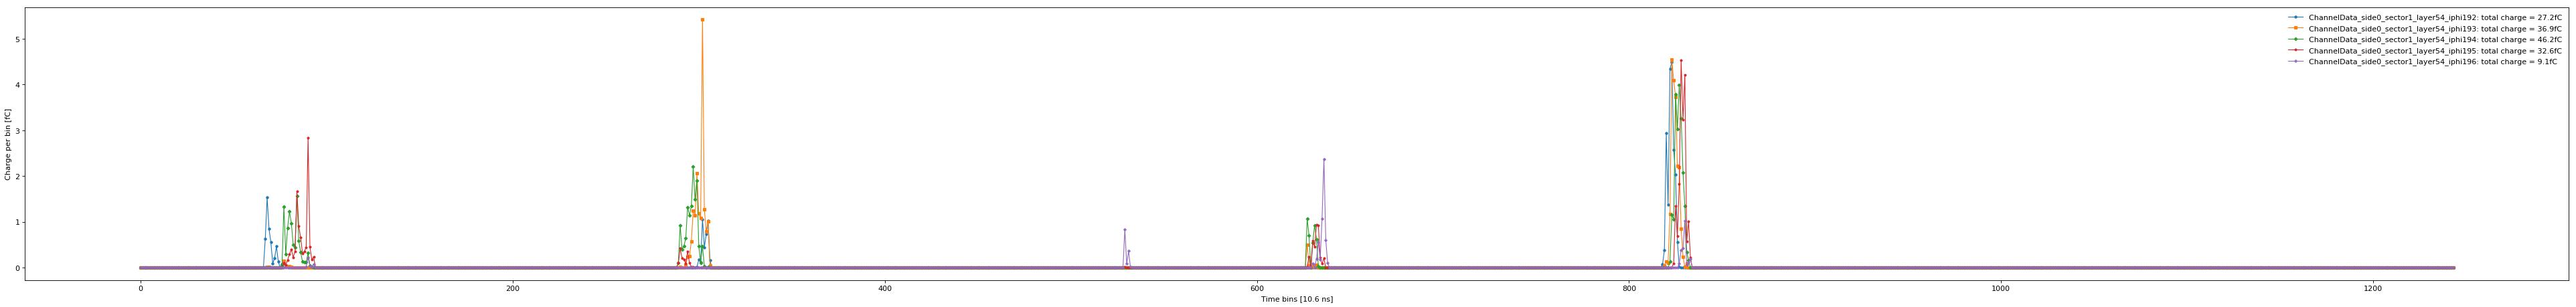

In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np

# inputDataSet = "PadCharge_SingleTrack/PadCharge_side0_sector1_layer7.json"
# inputDataSet = "PadCharge_SingleTrack/PadCharge_side0_sector1_layer40.json"
# inputDataSet = "PadCharge_SingleTrack/PadCharge_side0_sector1_layer47.json"

# inputDataSet = "PadCharge_0-4fm_AuAu/PadCharge_side0_sector1_layer7.json"
# inputDataSet = "PadCharge_0-4fm_AuAu/PadCharge_side0_sector1_layer23.json"

for layer in range(7, 7+48):
    
#     inputDataSet = "PadCharge_SingleTrack/PadCharge_side0_sector1_layer{}.json".format(layer)
    inputDataSet = "PadCharge_0-4fm_AuAu/PadCharge_side0_sector1_layer{}.json".format(layer)
    print ('Processing layer {} from {}'.format(layer, inputDataSet))


    with open(inputDataSet, "r") as read_file:
        dataset = json.load(read_file)

    Colors = ['#1f77b4',
              '#ff7f0e',
              '#2ca02c',
              '#d62728',
              '#9467bd',
              '#8c564b',
              '#e377c2',
              '#7f7f7f',
              '#bcbd22',
              '#17becf',
              '#1a55FF']
    Markers = ['o' , 's',  'D','p' , 'P']
    markiter = iter(Markers);
    coleriter = iter(Colors);

    fig = plt.figure(figsize=(50, 6), dpi= 80)
    ax = fig.add_axes([0.05, 0.15, 0.95, 0.85])
    plt.xlabel('Time bins [{} ns]'.format(dataset[list(dataset.keys())[0]]['TimeSpacing_ns']))
    plt.ylabel('Charge per bin [fC]')


    nTimeBins = dataset[list(dataset.keys())[0]]['TimeBins']
    TimeBins = np.arange(nTimeBins)

    count = 0
    for key in dataset.keys():
        count += 1
        if count>5: 
            break

    #     print(dataset[key]['ChargeTimeBin'])
        ax.plot(TimeBins, 
            np.array(dataset[key]['ChargeTimeBin']) * 1.6e-4, # convert from electrons to fC
            marker=next(markiter), color=next(coleriter), markersize = 3, linewidth = 1,
            label=key + ': total charge = {:.1f}fC'.format(dataset[key]['TotalCharge'] * 1.6e-4 ))

    plt.legend(loc='best', frameon=False)


    plt.savefig(inputDataSet + ".ChargeTimeBin.png", dpi=150)
    plt.savefig(inputDataSet + ".ChargeTimeBin.pdf", dpi=150)
    

In [3]:
# # %save_html os.path.join(DataDir,"analysis.html")
# import sys
# import os
# from subprocess import check_call

# d, fname = os.path.split(sys.executable)
# # print (d,fname)
# check_call([os.path.join(d,'ipython'), 'nbconvert',
#             '--to', 'html',
#             'ReadME.ipynb',
#             '--output',
#             "ReadME.html"])
# check_call([os.path.join(d,'ipython'), 'nbconvert',
#             '--to', 'pdf',
#             'RateAnalysis.ipynb',
#             '--output',
#             "ReadME.pdf"])

# Scratch

In [4]:
print(dataset[list(dataset.keys())[0]]['TimeBins'])

1244


In [5]:
[range(1:nTimeBins)]

SyntaxError: invalid syntax (<ipython-input-5-bcfa9ebf43e0>, line 1)